In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fuel_economy_csv = 'C:/users/rickk/Documents/DataScience/GeneralAssembly/Final_Project/dataset/database.csv'
fuel_economy = pd.read_csv(fuel_economy_csv, dtype={'Transmission Descriptor': str,
                                                   'Fuel Type 2': str,
                                                   'Start Stop Technology': str,
                                                   'Electric Motor': str,
                                                   'Manufacturer Code': str,
                                                   'Vehicle Charger': str,
                                                   'Alternate Charger': str,
                                                   'Range (FT2)': str}).fillna(0)
# reading in data produced error message for mixed types columns (7,16,62,64,65,67,68,78) - explored with .iloc[:,col]
# column iloc[78] Range (FT2) has ranges and sometimes several values at the same time included
# need to split or define new column with middle value of ranges given in that column iloc[78] if I use it
# filling all NaN with zero values

More information available at: https://www.fueleconomy.gov/feg/ws/index.shtml#ft2

In [3]:
print (fuel_economy.shape)

(38113, 81)


## Initial clean-up of data set
1. Renaming columns for better handling and interpretability
2. Dropping non-required columns (as explained in EDA - notes repeated here for easier following of steps)

In [4]:
# renaming columns to make data easier to handle
fuel_economy = fuel_economy.rename(columns = {'Vehicle ID': 'ID', 'Year': 'vintage', 'Make': 'make', 'Model': 'model',
                                              'Class': 'class', 'Drive': 'wheel_drive', 'Transmission': 'transm',
                                              'Transmission Descriptor': 'transm_descr', 'Engine Index': 'engine_ind',
                                              'Engine Descriptor': 'engine_descr', 'Engine Cylinders': 'num_cylinder',
                                              'Engine Displacement': 'engine_displace', 'Turbocharger': 'turbo', 'Supercharger': 'super',
                                              'Fuel Type': 'FT', 'Fuel Type 1': 'FT1', 'Fuel Type 2': 'FT2', 'City MPG (FT1)': 'city_mpg_1',
                                              'Unrounded City MPG (FT1)': 'city_mpg_1_exact', 'City MPG (FT2)': 'city_mpg_2',
                                              'Unrounded City MPG (FT2)': 'city_mpg_2_exact', 'City Gasoline Consumption (CD)': 'city_gas_cons',
                                              'City Electricity Consumption': 'city_e_cons', 'City Utility Factor': 'city_utility',
                                              'Highway MPG (FT1)': 'hw_mpg_1', 'Unrounded Highway MPG (FT1)': 'hw_mpg_1_exact',
                                              'Highway MPG (FT2)': 'hw_mpg_2', 'Unrounded Highway MPG (FT2)': 'hw_mpg_2_exact',
                                              'Highway Gasoline Consumption (CD)': 'hw_gas_cons', 
                                              'Highway Electricity Consumption': 'hw_e_cons', 'Highway Utility Factor': 'hw_utility',
                                              'Unadjusted City MPG (FT1)': 'city_mpg_1_unadj',
                                              'Unadjusted Highway MPG (FT1)': 'hw_mpg_1_unadj',
                                              'Unadjusted City MPG (FT2)': 'city_mpg_2_unadj',
                                              'Unadjusted Highway MPG (FT2)': 'hw_mpg_2_unadj',
                                              'Combined MPG (FT1)':'combi_mpg_1', 'Unrounded Combined MPG (FT1)': 'combi_mpg_1_exact',
                                              'Combined MPG (FT2)': 'combi_mpg_2', 'Unrounded Combined MPG (FT2)': 'combi_mpg_2_exact',
                                              'Combined Electricity Consumption': 'combi_e_cons',
                                              'Combined Gasoline Consumption (CD)': 'combi_gas_cons', 'Combined Utility Factor': 'combi_utility',
                                              'Annual Fuel Cost (FT1)': 'cost_1', 'Annual Fuel Cost (FT2)': 'cost_2',
                                              'Gas Guzzler Tax': 'guzzler_tax', 'Save or Spend (5 Year)': 'save_or_spend',
                                              'Annual Consumption in Barrels (FT1)': 'barrels_1', 'Annual Consumption in Barrels (FT2)': 'barrels_2',
                                              'Tailpipe CO2 (FT1)': 'co2_1', 'Tailpipe CO2 in Grams/Mile (FT1)': 'co2_gm_1',
                                              'Tailpipe CO2 (FT2)': 'co2_2', 'Tailpipe CO2 in Grams/Mile (FT2)': 'co2_gm_2',
                                              'Fuel Economy Score': 'fuel_eco_score', 'GHG Score': 'ghg_score',
                                              'GHG Score (Alt Fuel)': 'ghg_score_alt', 'My MPG Data': 'my_mpg',
                                              '2D Passenger Volume': '2D_pass_vol', '2D Luggage Volume': '2D_lugg_vol',
                                              '4D Passenger Volume': '4D_pass_vol', '4D Luggage Volume': '4D_lugg_vol',
                                              'Hatchback Passenger Volume': 'hatchb_pass_vol', 'Hatchback Luggage Volume': 'hatchb_lugg_vol',
                                              'Start Stop Technology': 'start_stop', 'Alternative Fuel/Technology': 'alt_fuel',
                                              'Electric Motor': 'e_motor', 'Manufacturer Code': 'manuf_code',
                                              'Gasoline/Electricity Blended (CD)': 'g_e_blend', 'Vehicle Charger': 'charger',
                                              'Alternate Charger': 'charger_alt', 'Hours to Charge (120V)':'charge_hr_120V',
                                              'Hours to Charge (240V)': 'charge_hr_240V','Hours to Charge (AC 240V)': 'charge_hr_240V_AC',
                                              'Composite City MPG': 'city_mpg_composite',
                                              'Composite Highway MPG': 'hw_mpg_composite',
                                              'Composite Combined MPG': 'combi_mpg_composite',
                                              'Range (FT1)': 'range_1', 'City Range (FT1)': 'range_city_1', 'Highway Range (FT1)': 'range_hw_1',
                                              'Range (FT2)': 'range_2', 'City Range (FT2)': 'range_city_2', 'Highway Range (FT2)': 'range_hw_2'},
                                 )

In [5]:
# several columns feel redundant or have almost no values. In order to clean up the data, suggest to drop a subset
# Very limited information available in many columns (from visual inspection above), e.g. city_gas_cons or _e_cons; composite info
# ... as per EPA these are gasoline consumption in battery depleting mode and e-consumption in kWh/100 miles
# ... and utility factor is share of electricity used by PEHV
# Volume information is in cubic feet (not weight) and had many zero values, too - dropping for now (might revise later)
# no values for 120V-charging
# there are 120 types of e-motors; which also feel irrelevant; the 'chargers' are more standardized
# and according to the EPA the fuel_economy of Electric Vehicles and Hybrids is measured by the charge source, not
# g_e_blend only for 45 car models
# Other values are going to be irrelevant for predictions, such as manuf_code, ID, charge_hr_xxx, eng_ind and all _descr
# save or spend compares to average car (plus=save, minus=spend) and hence has colinearity to cost column, should drop
# CO2 grams/mile are redundant to CO2 tailpipe, also because we don't have mileage driven (tests use standard 15,000 miles/year)
# alt_fuel - assuming it refers to other models of that make for which there is no data in this file
# the specifications on mpg for city/hw/combi on both FT 1 and FT2 _exact or _unadj turn out to either miss datapoints or be 
# ... nearly identical to 'normal' mpg_[FT#]
# 'my_mpg' is a self-reported fuel data points (with Y or N responses), which feels irrelevant to predicting cost or co2
# _city and _hw mpgs are 95%+ correlated to combi_mpg, esp. for FT1, which I think represents a mix of city and hw driving
# ... with 55% city driving in combi value. To avoid colinearity, dropping variables _city_mpg_ and _hw_mpg_
# ghg_score_alt is mostly negative -1 and only in data for a few years - duplicative and redundant to new ghg_score

fuel_economy.drop(['city_gas_cons', 'city_e_cons', 'city_utility', 'hw_gas_cons', 'hw_e_cons', 'hw_utility',
                   'combi_e_cons', 'combi_gas_cons', 'combi_utility', 'city_mpg_composite', 'hw_mpg_composite',
                   'combi_mpg_composite', '2D_pass_vol', '2D_lugg_vol', '4D_pass_vol','4D_lugg_vol',
                   'hatchb_pass_vol', 'hatchb_lugg_vol',
                   'e_motor',
                   'manuf_code', 'ID', 'g_e_blend', 'engine_ind', 'engine_descr', 'transm_descr', 
                   'charge_hr_120V', 'charge_hr_240V', 'charge_hr_240V_AC',
                   'save_or_spend',
                   'co2_gm_1', 'co2_gm_2',
                   'alt_fuel', 'ghg_score_alt',
                   'city_mpg_1_exact', 'city_mpg_2_exact', 'city_mpg_1_unadj', 'city_mpg_2_unadj', 'hw_mpg_1_exact',
                   'hw_mpg_2_exact', 'hw_mpg_1_unadj', 'hw_mpg_2_unadj', 
                   'combi_mpg_1_exact', 'combi_mpg_2_exact', 'my_mpg',
                   'city_mpg_1', 'hw_mpg_1', 'city_mpg_2', 'hw_mpg_2'], axis=1, inplace=True)

In [6]:
fuel_economy.shape
# from 81 to 33 columns and a few more open questions to address next

(38113, 33)

## Additional conversions required to data
1. get dummies for fuel_types, drop most common (FT1 == regular and FT2 == 0)
2. Turn categorical values into numerical values: gas guzzler tax, start/stop technology, and others
3. Transmission (2WD or 4WD)
4. replace -1 (not available) in fuel_eco_score and in ghg_score with 0

In [7]:
# Get dummies for fuel_type FT1 and FT2 shows that the most common fuel type is Regular Gasoline (26,531)
ft_1_dummies = pd.get_dummies(fuel_economy['FT1'])
ft_1_dummies

,Diesel,Electricity,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,0,0,0,1
7,0,0,0,0,0,1
8,0,0,0,0,0,1
9,0,0,0,0,0,1


In [8]:
# dropping default type from dataset --- is that necessary ???
# ft_1_dummies.drop('Regular Gasoline', axis=1, inplace=True)

In [9]:
# repeat for FT2 --- in most cases there is no FT2 available, i.e. FT2 == 0 in 36,675 cases
ft_2_dummies = pd.get_dummies(fuel_economy['FT2'])
ft_2_dummies

,0,E85,Electricity,Natural Gas,Propane
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,1,0,0,0,0


In [10]:
# drop the default column: 0 --- is that necessary ???
ft_2_dummies.drop(0, axis=1, inplace=True)

In [11]:
# merge fuel-dummies back in with concat
fuel_economy = pd.concat([fuel_economy, ft_1_dummies, ft_2_dummies], axis=1)

In [12]:
# Gas Guzzler Tax
fuel_economy.groupby('guzzler_tax')['vintage'].describe()

,count,mean,std,min,25%,50%,75%,max
guzzler_tax,,,,,,,,
0,35817.0,2000.039367,10.498206,1984.0,1990.0,2000.0,2009.0,2017.0
G,1317.0,2009.703113,4.553708,1998.0,2007.0,2010.0,2013.0,2017.0
S,15.0,2000.733333,2.153624,1998.0,1999.0,2000.0,2002.0,2005.0
T,964.0,1992.960581,5.434066,1984.0,1989.0,1992.0,1996.0,2003.0


In [13]:
# Categories G and T are subject to tax and get value 1; all other instances (0 and S) get values 0> new col: 'pays_guzzler_tax'
fuel_economy.loc[:,'pays_guzzler_tax'] = fuel_economy.loc[:,'guzzler_tax'].map({0: 0, 'S': 0, 
                                                                                'G': 1, 'T': 1})

In [14]:
# start_stop technology information is either not available (0) or N(0) or Y(1) --- need to reframe categorical to enable analysis
# existence of start_stop technology should be negatively correlated to consumption (barrels) and hence cost for FT
fuel_economy.loc[:,'start_stop'].value_counts()

0    31670
N     4677
Y     1766
Name: start_stop, dtype: int64

In [15]:
# Category Y = 1, rest (0 and N ) equal 0> new col: 'has_start_stop'
fuel_economy.loc[:,'has_start_stop']=fuel_economy.loc[:,'start_stop'].map({0: 0, 'N': 0, 
                                                                           'Y': 1})

In [16]:
# Category Turbo Charger T = 1, rest 0 (n/a or none)> new col: 'has_turbo'
fuel_economy.loc[:,'has_turbo'] = fuel_economy.loc[:,'turbo'].map({0: 0, 
                                                                   'T': 1})

In [17]:
# Category super charger - S = 1 and rest 0 (n/a or none)> new col: 'has_super'
fuel_economy.loc[:,'has_super'] = fuel_economy.loc[:,'super'].map({0: 0, 
                                                                   'S': 1})

In [18]:
# Note: Fuel Economy and GHG scores of -1 mean not available. For better calcs, I will replace the -1 with 0
fuel_economy.loc[:,'fuel_eco_score'].replace([-1],0, inplace=True)
fuel_economy.loc[:,'ghg_score'].replace([-1],0, inplace=True)

In [19]:
fuel_economy.loc[:,'transm'].value_counts()
# combination of automatic and manual and the number of gears. Automatic = 0, Manual = 1 and for gears whatever number, default=5
fuel_economy.loc[:,'transm_type'] = fuel_economy.loc[:,'transm'].map({'Automatic 4-Speed': 0, 'Automatic 3-Speed': 0, 'Automatic (S6)': 0,
                                                                      'Automatic 5-Speed': 0, 'Automatic 6-Speed': 0, 'Automatic (S8)': 0,
                                                                      'Automatic (S5)': 0, 'Automatic (variable gear ratios)': 0,
                                                                      'Automatic 7-Speed': 0, 'Automatic (S7)': 0, 'Auto(AM-S7)': 0, 'Auto(AM6)': 0,
                                                                      'Automatic 8-Speed': 0, 'Automatic (S4)': 0, 'Auto(M7)': 0, 'Auto(AM7)': 0,
                                                                      'Auto(AV-S6)': 0, 'Automatic (A1)': 0, 'Auto(M6)': 0, 'Automatic 9-Speed': 0,
                                                                      'Auto(AM-S6)': 0, 'Auto(AV-S7)': 0, 'Automatic (S9)': 0, 'Auto (AV-S8)': 0,
                                                                      'Auto(AM5)': 0, 'Automatic (AV-S6)': 0, 'Automatic (S10)':0, 'Auto(AM-S8)': 0,
                                                                      'Auto(AM8)': 0, 'Automatic (A6)': 0, 'Automatic (AV)': 0, 'Auto(AV)': 0, 'Auto (AV)': 0,
                                                                      'Automatic (AM5)': 0, 'Auto(L3)': 0, 'Auto(L4)': 0, 'Automatic (AM6)': 0,
                                                                      'Auto (AV-S8)': 0, 'Auto(AV-S8)': 0, 'Auto(AM-S9)': 0, 'Automatic 6Speed': 0, 'Auto (AV-S6)': 0,
                                                                      0: 0,
                                                                     'Manual 4-Speed': 1, 'Manual 5-Speed': 1, 'Manual 6-Speed': 1, 'Manual 3-Speed': 1,
                                                                     'Manual 7-Speed': 1, 'Manual 4-Speed Doubled': 1, 'Manual(M7)': 1,
                                                                     'Manual 5 Speed': 1})
fuel_economy.loc[:,'num_gears'] = fuel_economy.loc[:,'transm'].map({'Automatic 4-Speed': 4, 'Automatic 3-Speed': 3, 'Automatic (S6)': 6,
                                                                      'Automatic 5-Speed': 5, 'Automatic 6-Speed': 6, 'Automatic (S8)': 8,
                                                                      'Automatic (S5)': 5, 'Automatic (variable gear ratios)': 5,
                                                                      'Automatic 7-Speed': 7, 'Automatic (S7)': 7, 'Auto(AM-S7)': 7, 'Auto(AM6)': 6,
                                                                      'Automatic 8-Speed': 8, 'Automatic (S4)': 4, 'Auto(M7)': 7, 'Auto(AM7)': 7,
                                                                      'Auto(AV-S6)': 6, 'Automatic (A1)': 1, 'Auto(M6)': 6, 'Automatic 9-Speed': 9,
                                                                      'Auto(AM-S6)': 6, 'Auto(AV-S7)': 7, 'Automatic (S9)': 9, 'Auto (AV-S8)': 8,
                                                                      'Auto(AM5)': 5, 'Automatic (AV-S6)': 6, 'Automatic (S10)':10, 'Auto(AM-S8)': 8,
                                                                      'Auto(AM8)': 8, 'Automatic (A6)': 6, 'Automatic (AV)': 5, 'Auto(AV)': 5, 'Auto (AV)': 5,
                                                                      'Automatic (AM5)': 5, 'Auto(L3)': 3, 'Auto(L4)': 4, 'Automatic (AM6)': 6,
                                                                      'Auto (AV-S8)': 8, 'Auto(AV-S8)': 8, 'Auto(AM-S9)': 9, 'Automatic 6Speed': 6, 'Auto (AV-S6)': 6,
                                                                      0: 0,
                                                                     'Manual 4-Speed': 4, 'Manual 5-Speed': 5, 'Manual 6-Speed': 6, 'Manual 3-Speed': 3,
                                                                     'Manual 7-Speed': 7, 'Manual 4-Speed Doubled': 4, 'Manual(M7)': 7,
                                                                     'Manual 5 Speed': 5})

In [20]:
# there are 34 different types of classes in the data set --- it might be worth bundling and comparing them with respect to their
# cost_1 (for FT1) and cost_2 (for FT2) and their fuel_eco_score and ghg_score >>> group into XL/large/med/small = 4/3/2/1
fuel_economy.loc[:,'class'].value_counts()
fuel_economy.loc[:,'class_num'] = fuel_economy.loc[:,'class'].map({'Subcompact Cars': 1, 'Two Seaters': 1, 'Minicompact Cars': 1,
                                     'Compact Cars': 2, 'Midsize Cars': 2, 'Small Station Wagons': 2, 'Small Pickup Trucks': 2,
                                     'Small Sport Utility Vehicle 4WD': 2, 'Small Sport Utility Vehicle 2WD': 2, 
                                     'Small Pickup Trucks 2WD': 2, 'Small Pickup Trucks 4WD': 2,
                                    'Standard Pickup Trucks': 3, 'Sport Utility Vehicle - 4WD': 3, 'Large Cars': 3,
                                    'Sport Utility Vehicle - 2WD': 3, 'Standard Pickup Trucks 2WD': 3, 'Standard Pickup Trucks 4WD': 3,
                                     'Midsize-Large Station Wagons': 3, 'Midsize Station Wagons': 3,
                                     'Standard Sport Utility Vehicle 4WD': 3, 'Standard Sport Utility Vehicle 2WD': 3,
                                     'Minivan - 2WD': 3, 'Minivan - 4WD': 3, 'Standard Pickup Trucks/2wd': 3,
                                    'Special Purpose Vehicles': 4, 'Special Purpose Vehicle 2WD': 4, 'Vans': 4, 'Vans, Cargo Type': 4,
                                    'Vans, Passenger Type': 4, 'Special Purpose Vehicle 4WD': 4, 'Special Purpose Vehicles/4wd': 4,
                                    'Special Purpose Vehicles/2wd': 4, 'Vans Passenger': 4, 'Special Purpose Vehicle': 4})

In [21]:
fuel_economy.loc[:,'wheel_drive'].value_counts()
# All wheel or four-wheel drive --- gets value 4; two-wheel drive or Front/Rear (=2) --- gets value 2 as well
fuel_economy.loc[:,'wheel_drive_num'] = fuel_economy.loc[:,'wheel_drive'].map({'Front-Wheel Drive': 2, 'Rear-Wheel Drive': 2,
                                                                               '2-Wheel Drive': 2,
                                                                               0: 0,
                                                                               'Part-time 4-Wheel Drive': 3,
                                                                              '4-Wheel or All-Wheel Drive': 4, 'All-Wheel Drive': 4,
                                                                              '4-Wheel Drive': 4})
# front vs rear could be relevant: Front = 0, Rear = 1, All = 2
fuel_economy.loc[:,'wheel_drive_type'] = fuel_economy.loc[:,'wheel_drive'].map({'Front-Wheel Drive': 0, 'Rear-Wheel Drive': 1,
                                                                               '2-Wheel Drive': 1,
                                                                               0: 0,
                                                                               'Part-time 4-Wheel Drive': 1,
                                                                              '4-Wheel or All-Wheel Drive': 2, 'All-Wheel Drive': 2,
                                                                              '4-Wheel Drive': 2})

In [22]:
fuel_economy.loc[:,'charger'].value_counts()
# From quick google search: standard charger seems to be 3.3 kW for most car models; assume single charger is same
fuel_economy.loc[:,'kW'] = fuel_economy.loc[:,'charger'].map({0: 0,
                                                             'standard charger': 3.3, 'single charger': 3.3,
                                                             '3.6 kW charger': 3.6,
                                                             '6.6 kW charger': 6.6,
                                                             '7.2 kW charger': 7.2})

In [23]:
fuel_economy.loc[:,'charger_alt'].value_counts()# From quick google search: dual charger is Tesla 10kW and 20kW and a few other models - check here: confirmed (with and without '80 amp')
dual_charger = fuel_economy.loc[:,'charger_alt'] == 'dual charger'
fuel_economy.loc[dual_charger,:]

,vintage,make,model,class,wheel_drive,transm,num_cylinder,engine_displace,turbo,super,...,pays_guzzler_tax,has_start_stop,has_turbo,has_super,transm_type,num_gears,class_num,wheel_drive_num,wheel_drive_type,kW
33048,2013,Tesla,Model S (40 kW-hr battery pack),Large Cars,Rear-Wheel Drive,Automatic (A1),0.0,0.0,0,0,...,0,0,0,0,0,1,3,2,1,3.3
33049,2013,Tesla,Model S (60 kW-hr battery pack),Large Cars,Rear-Wheel Drive,Automatic (A1),0.0,0.0,0,0,...,0,0,0,0,0,1,3,2,1,3.3
33050,2013,Tesla,Model S (85 kW-hr battery pack),Large Cars,Rear-Wheel Drive,Automatic (A1),0.0,0.0,0,0,...,0,0,0,0,0,1,3,2,1,3.3


In [24]:
fuel_economy.loc[:,'charger_alt'].value_counts()
fuel_economy.loc[:,'kw_alt'] = fuel_economy.loc[:,'charger_alt'].map({'80 amp dual charger': 10, 'dual charger': 10,
                                                                      0: 0,
                                                                     '6.6 kW charger': 6.6,
                                                                     '3.6 kW charger': 3.6})

In [25]:
# range 2 includes more than 1 value at times and up to three values. Might be good idea to cast into new dataframe
# calculate the average for range 2 and then reintegrate the newly calculated averages into the fuel_economy dataframe
# > is this necessary??? where will I need range 2? [skip this step for now]

## Adding new information in columns to the dataset

In [26]:
# Annual barrel consumption (total) in combination with mpg gives miles driven but not where (city, hw, combined)
# note: 1 barrel = 42 gallons
# created two new columns with total mileage per row
fuel_economy.loc[:,'miles_1'] = (fuel_economy.loc[:,'barrels_1']*42) * fuel_economy.loc[:,'combi_mpg_1']
fuel_economy.loc[:,'miles_2'] = (fuel_economy.loc[:,'barrels_2']*42) * fuel_economy.loc[:,'combi_mpg_2']

In [27]:
fuel_economy.loc[:,['miles_1', 'miles_2']].describe()

,miles_1,miles_2
count,38113.000000,38113.000000
mean,13824.319378,128.649871
std,1046.886004,749.948038
min,78.120000,0.000000
25%,13843.620000,0.000000
50%,13843.620000,0.000000
75%,13843.620000,0.000000
max,16051.770000,13843.620000


## Checks on dataset before processing into model

In [28]:
# check on new columns
fuel_economy.head()

,vintage,make,model,class,wheel_drive,transm,num_cylinder,engine_displace,turbo,super,...,has_super,transm_type,num_gears,class_num,wheel_drive_num,wheel_drive_type,kW,kw_alt,miles_1,miles_2
0,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,0,Manual 5-Speed,6.0,2.5,0,0,...,0,1,5,1,0,0,0.0,0.0,13843.62,0.0
1,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,0,Manual 5-Speed,6.0,2.5,0,0,...,0,1,5,1,0,0,0.0,0.0,13843.62,0.0
2,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,0,Manual 5-Speed,4.0,2.0,0,0,...,0,1,5,1,0,0,0.0,0.0,13843.62,0.0
3,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,0,Manual 5-Speed,4.0,2.0,0,0,...,0,1,5,1,0,0,0.0,0.0,13843.62,0.0
4,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,4.0,2.5,0,0,...,0,0,3,4,2,1,0.0,0.0,13843.62,0.0


In [29]:
# Check on dtypes and overview over all columns currently in use
fuel_economy.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 56 columns):
vintage              38113 non-null int64
make                 38113 non-null object
model                38113 non-null object
class                38113 non-null object
wheel_drive          38113 non-null object
transm               38113 non-null object
num_cylinder         38113 non-null float64
engine_displace      38113 non-null float64
turbo                38113 non-null object
super                38113 non-null object
FT                   38113 non-null object
FT1                  38113 non-null object
FT2                  38113 non-null object
combi_mpg_1          38113 non-null int64
combi_mpg_2          38113 non-null int64
cost_1               38113 non-null int64
cost_2               38113 non-null int64
guzzler_tax          38113 non-null object
barrels_1            38113 non-null float64
barrels_2            38113 non-null float64
co2_1                38113 non-n

# Analysis: Fuel Economy Score and GHG score
**!Limit data (2013-2017) to last five years because scores are not available beforehand**
1. Explore dependence on fuel-types
2. Car model
3. CO2 emissions (tailpipe)
4. Other technical factors, like # cylinders, chargers etc.
<br>
<br>Note: best to blend out any remaining zero values

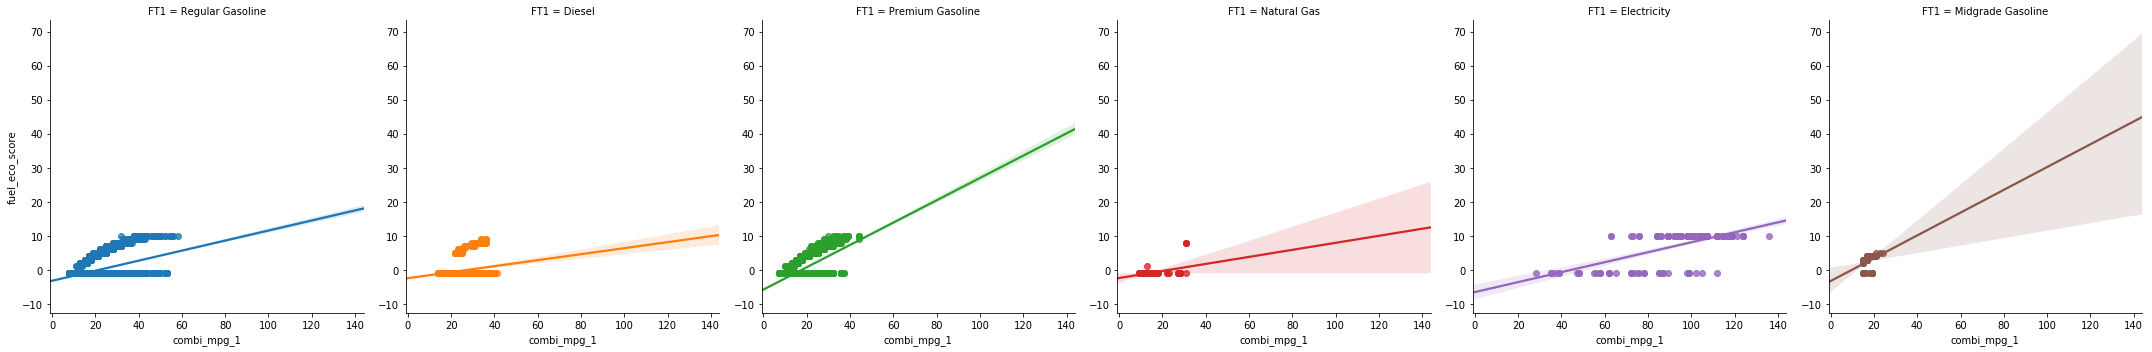

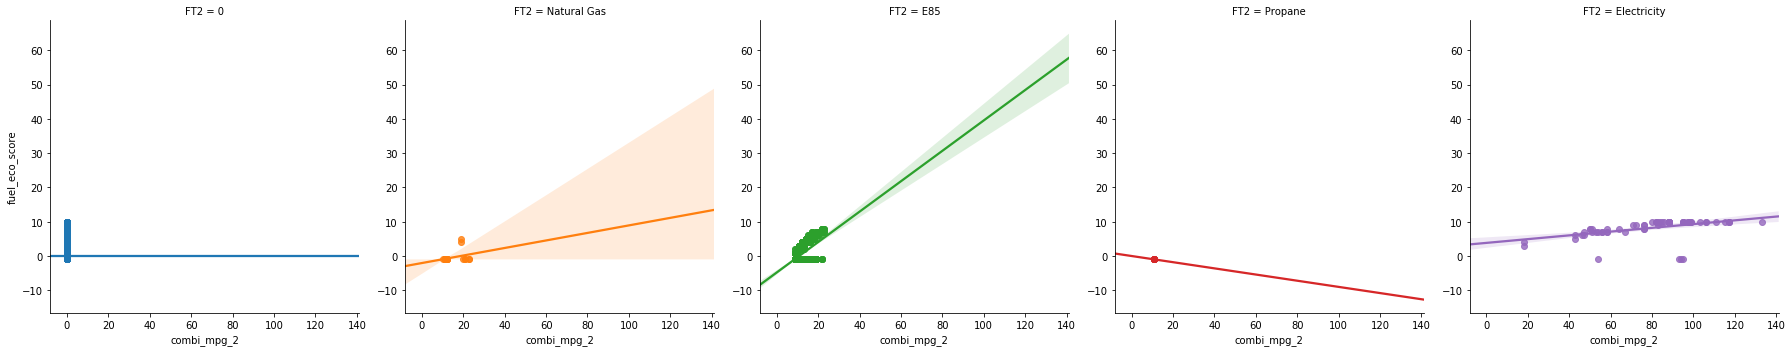

In [30]:
# Fuel Economy Scores - and _mpg_[FT#] show some patterns, if we ignore all fuel_eco_score = 0, the non-zeros roughly show higher
#... scores for higher mpg
sns.lmplot(x='combi_mpg_1', y='fuel_eco_score', data=fuel_economy,
          col='FT1', hue='FT1');
sns.lmplot(x='combi_mpg_2', y='fuel_eco_score', data=fuel_economy,
          col='FT2', hue='FT2');

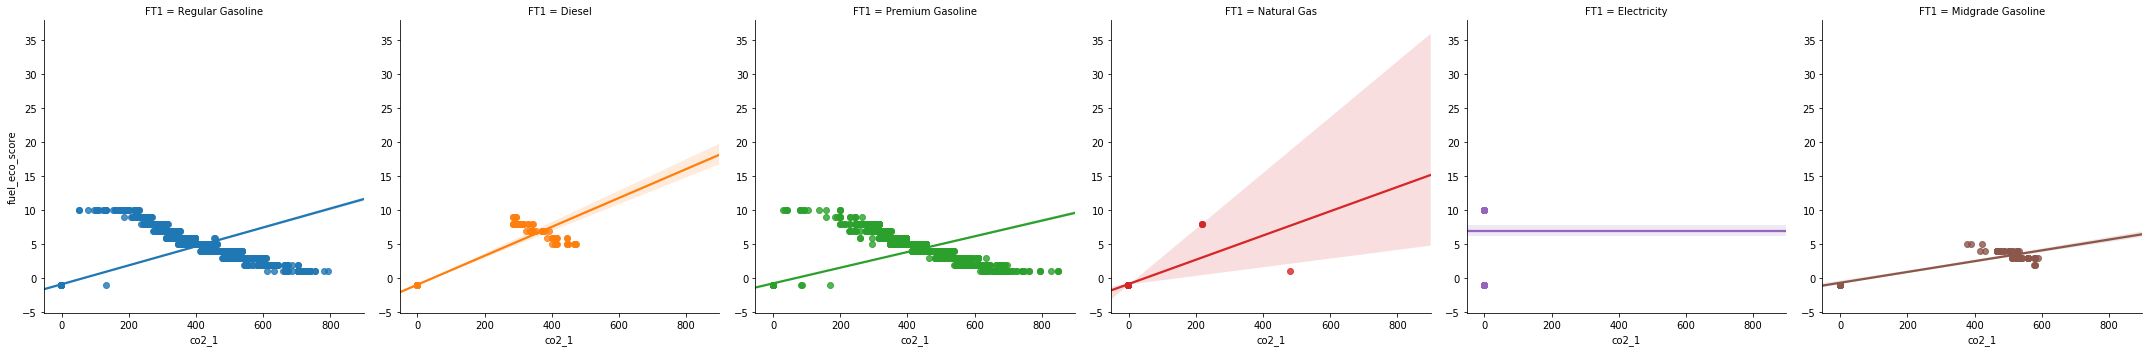

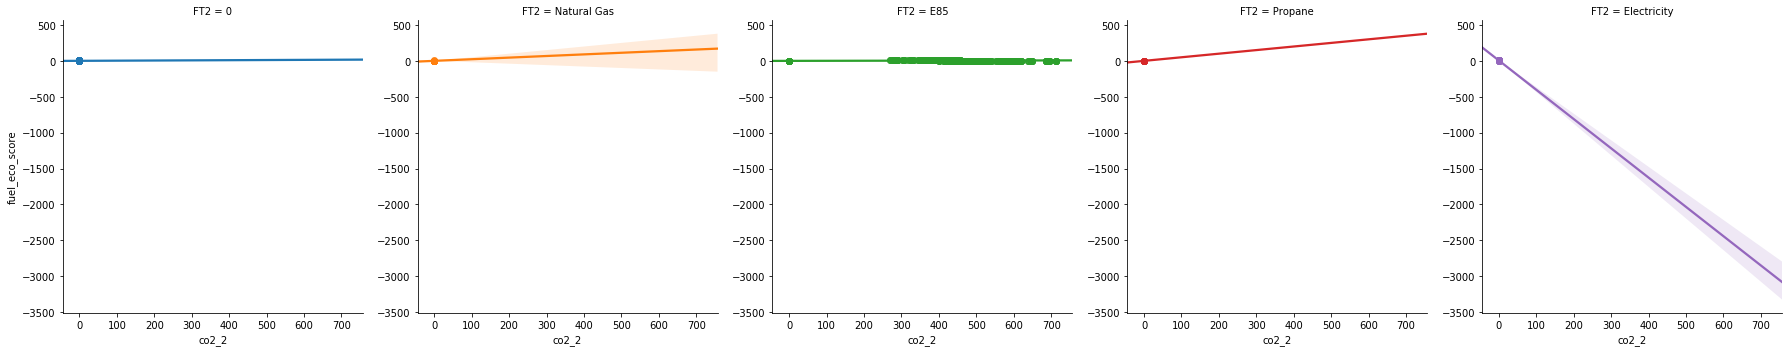

In [31]:
# The higher the CO2 content, the lower the FUel Economy Score
# Note: tailpipe CO2 is available by EPA test from 2013 onwards; prior years have been estimated
sns.lmplot(x='co2_1', y='fuel_eco_score', data=fuel_economy,
          col='FT1', hue='FT1');
sns.lmplot(x='co2_2', y='fuel_eco_score', data=fuel_economy,
          col='FT2', hue='FT2');

In [32]:
# Correlation calculation shows that fuel_eco_score is more closely affiliated with ghg_score and co2 than with any _mpg_
fuel_economy.loc[:,['fuel_eco_score', 'ghg_score',
                    'co2_1', 'co2_2',
                    'combi_mpg_1', 'combi_mpg_2']].corr()

,fuel_eco_score,ghg_score,co2_1,co2_2,combi_mpg_1,combi_mpg_2
fuel_eco_score,1.000000,0.999702,0.821253,0.179372,0.388847,0.168812
ghg_score,0.999702,1.000000,0.820889,0.179499,0.388436,0.173786
co2_1,0.821253,0.820889,1.000000,0.321045,0.078725,0.106364
co2_2,0.179372,0.179499,0.321045,1.000000,-0.030027,0.348152
combi_mpg_1,0.388847,0.388436,0.078725,-0.030027,1.000000,0.045121
combi_mpg_2,0.168812,0.173786,0.106364,0.348152,0.045121,1.000000


## Step 1: limit dataset to last 5 years and split by fuel_type 
Vintage is greater or equal to 2013

In [33]:
fuel_economy_ghg = fuel_economy.loc[(fuel_economy.loc[:,'vintage'] >= 2013),:]
fuel_economy_ghg.shape

(6120, 56)

Split into FT1 and FT2 - to do separate runs on data sets for FT1 only (i.e. FT2 = zero) and combined (none is zero)

In [34]:
no_FT2 = fuel_economy_ghg.loc[:,'FT2'] == 0
fuel_economy_ghg_1 = fuel_economy_ghg.loc[no_FT2,:]
fuel_economy_ghg_2 = fuel_economy_ghg.loc[~no_FT2,:]

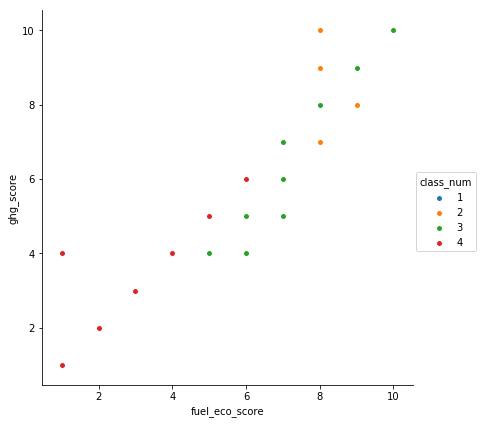

In [35]:
sns.pairplot(fuel_economy_ghg_1, x_vars='fuel_eco_score', y_vars='ghg_score', 
            kind='scatter', hue='class_num', dropna=True, size=6);

**Note** It seems that the *fuel_eco_score* and the *ghg_score* can be regarded as **synonymous** for the purpose of this analysis. Decided to focus on **fuel_eco_score** only.

## Step 2: build a model - Linear Regression

** Note ** Other models make limited sense, because the prediction value is not binary (as in our glass example); it is continous. *KNN model could work* if you consider the fuel-eco-scores to represent ~10 potential classes of outcomes

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Fuel Type 1,  co2_1


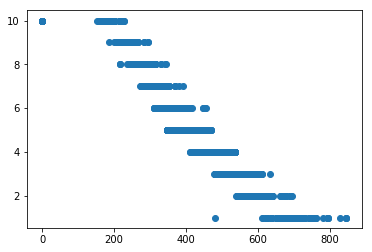

Fuel Type 1,  combi_mpg_1


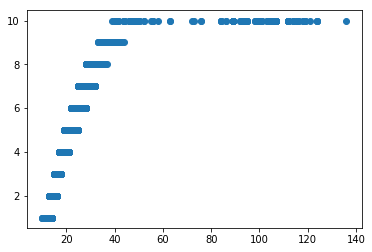

Fuel Type 1,  class_num


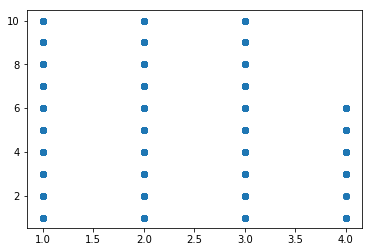

Fuel Type 1,  pays_guzzler_tax


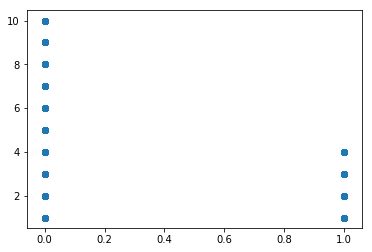

Fuel Type 1,  kW


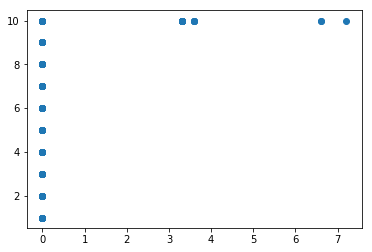

Fuel Type 1,  ghg_score


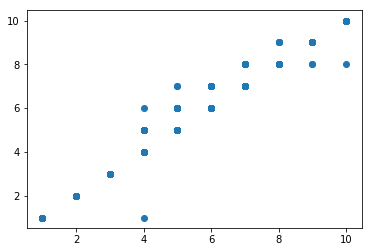

Fuel Type 2,  co2_2


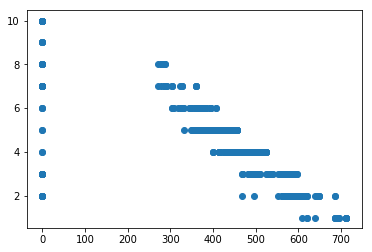

Fuel Type 2,  combi_mpg_2


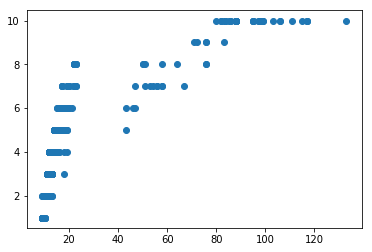

Fuel Type 2,  class_num


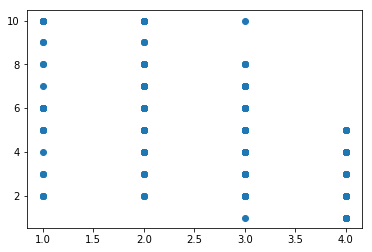

Fuel Type 2,  pays_guzzler_tax


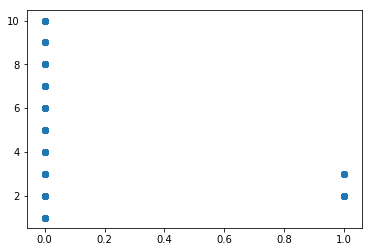

Fuel Type 2,  ghg_score


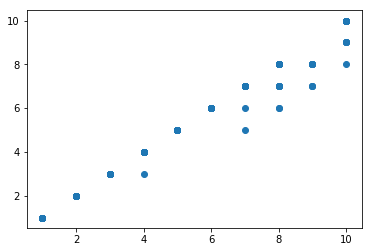

In [37]:
# Revisiting some of the EDA - to find most relevant columns - scatterplot comparison
# FT1 class_num is not a good predictor of fuel_eco_score, because that's distributed all the way from 1 to 10
# and for FT1 for pays_guzzler_tax, if yes, the max fuel_eco_score is 4; kW has lots of zeros and anything but zero has score=10
# FT2 has a lot of zero values on co2_2; FT2 - kW is always zero > replace with kw_alt - same picture (skip var)
# Overall: good on co2, combi_mpg, ghg_score

for var in ['co2_1', 'combi_mpg_1', 'class_num', 'pays_guzzler_tax', 'kW', 'ghg_score']:
    print ("Fuel Type 1, ", var)
    x = fuel_economy_ghg_1.loc[:,var]
    y = fuel_economy_ghg_1.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();
for var in ['co2_2', 'combi_mpg_2', 'class_num', 'pays_guzzler_tax', 'ghg_score']:
    print ("Fuel Type 2, ", var)
    x = fuel_economy_ghg_2.loc[:, var]
    y = fuel_economy_ghg_2.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();


Fuel Type 1,  vintage


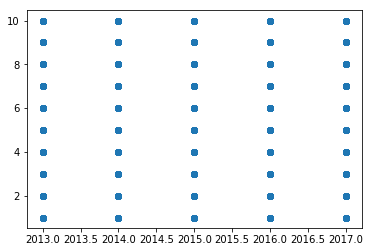

Fuel Type 1,  num_cylinder


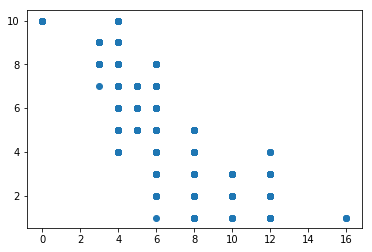

Fuel Type 1,  engine_displace


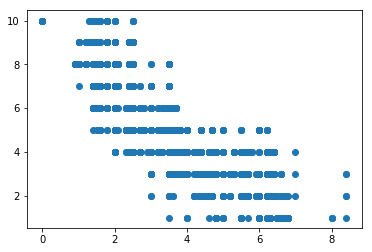

Fuel Type 1,  has_turbo


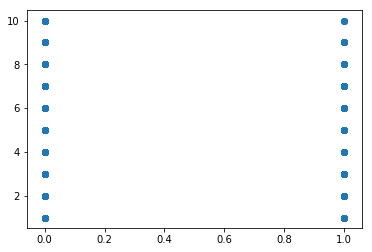

Fuel Type 1,  has_super


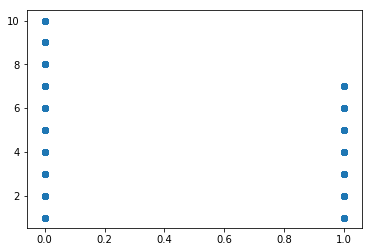

Fuel Type 1,  has_start_stop


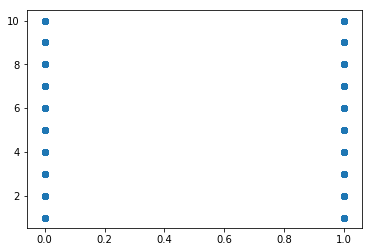

Fuel Type 1,  num_gears


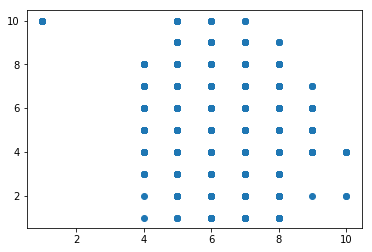

Fuel Type 1,  wheel_drive_num


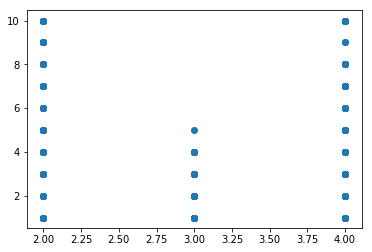

Fuel Type 2,  vintage


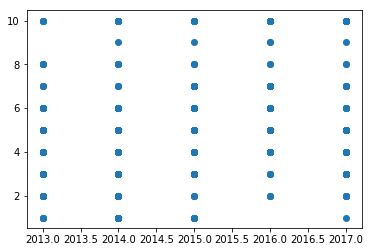

Fuel Type 2,  num_cylinder


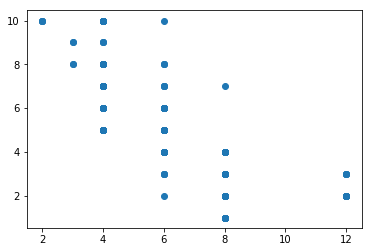

Fuel Type 2,  engine_displace


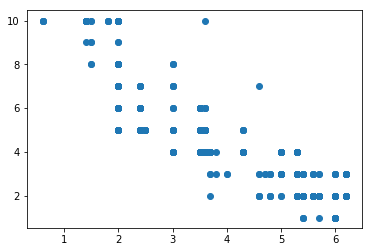

Fuel Type 2,  has_turbo


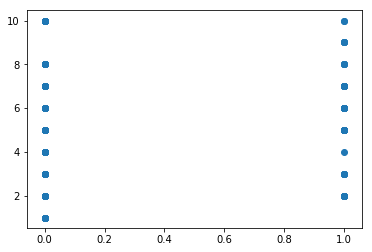

Fuel Type 2,  has_super


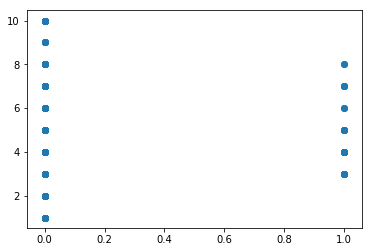

Fuel Type 2,  has_start_stop


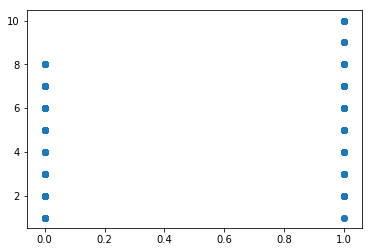

Fuel Type 2,  num_gears


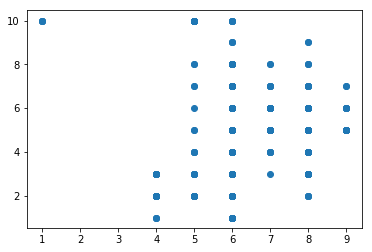

Fuel Type 2,  wheel_drive_num


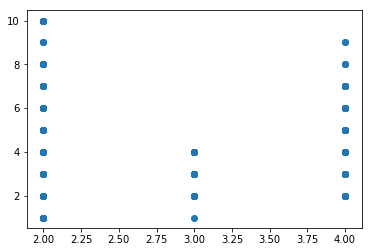

In [38]:
# Revisiting some of the EDA - to find most relevant columns - scatterplot comparison
# FT 1 and 2: Vintage, turbo,super, start_stop, num_gears, wheel_drive_num are all over the place
#... some pattern on num_cylinder and engine_displace (not strong)

for var in ['vintage', 'num_cylinder', 'engine_displace', 'has_turbo', 'has_super', 'has_start_stop', 'num_gears', 'wheel_drive_num']:
    print ("Fuel Type 1, ", var)
    x = fuel_economy_ghg_1.loc[:,var]
    y = fuel_economy_ghg_1.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();
for var in ['vintage', 'num_cylinder', 'engine_displace', 'has_turbo', 'has_super', 'has_start_stop', 'num_gears', 'wheel_drive_num']:
    print ("Fuel Type 2, ", var)
    x = fuel_economy_ghg_2.loc[:, var]
    y = fuel_economy_ghg_2.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();

Fuel Type 1,  cost_1


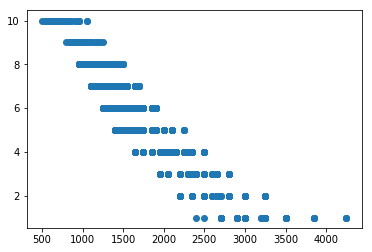

Fuel Type 1,  barrels_1


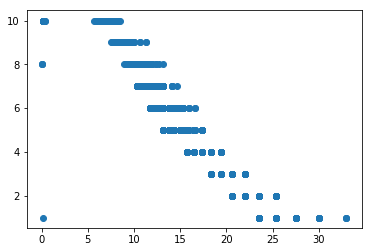

Fuel Type 1,  range_1


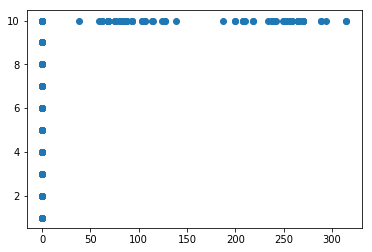

Fuel Type 1,  miles_1


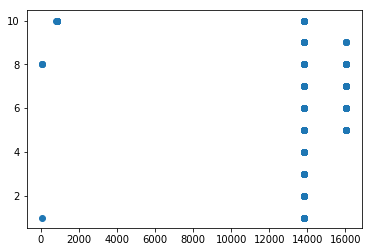

Fuel Type 1,  Regular Gasoline


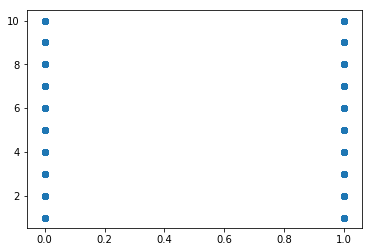

Fuel Type 1,  Diesel


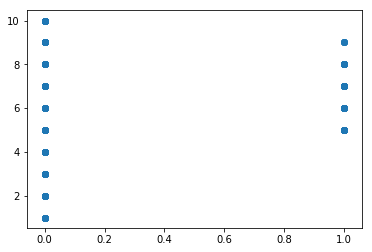

Fuel Type 1,  Midgrade Gasoline


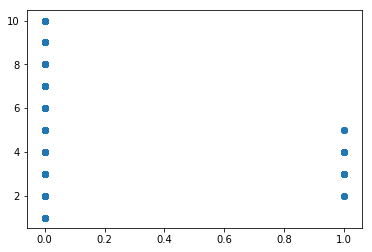

Fuel Type 1,  transm_type


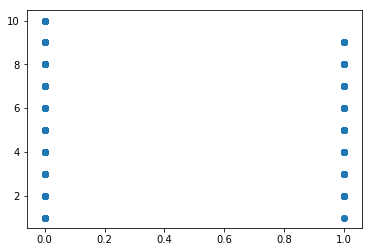

Fuel Type 1,  wheel_drive_type


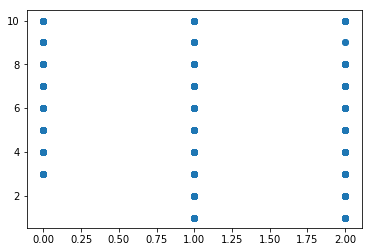

Fuel Type 2,  cost_2


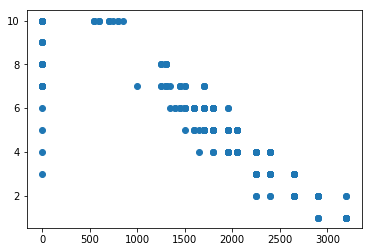

Fuel Type 2,  barrels_2


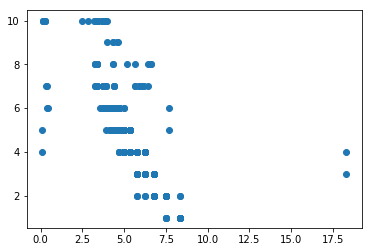

Fuel Type 2,  range_2


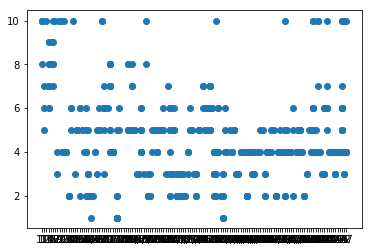

Fuel Type 2,  miles_2


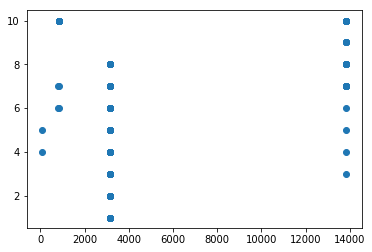

Fuel Type 2,  Regular Gasoline


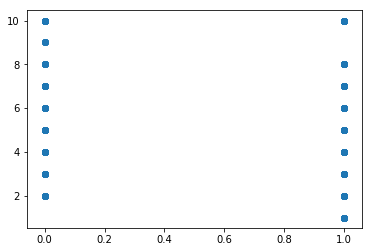

Fuel Type 2,  E85


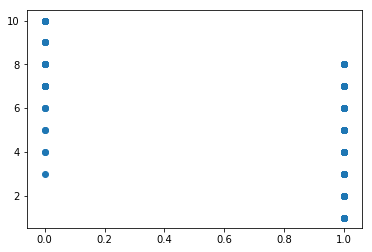

Fuel Type 2,  Propane


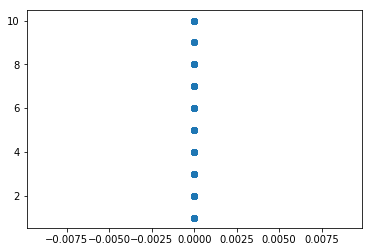

Fuel Type 2,  transm_type


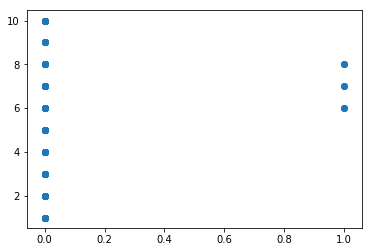

Fuel Type 2,  wheel_drive_type


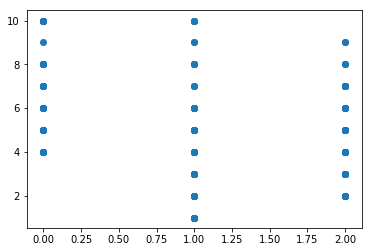

In [39]:
# Revisiting some of the EDA - to find most relevant columns - scatterplot comparison
# FT 1: cost and barrels are similarly distributes as co2 (the more, the lower the score); Diesel has higher scores than Midgrade
# ...weird picture on range 1 (other score all over if range=0 or score is 10 for ranges>50); not clear on miles_1
# ... transm_type and wheel_drive_type make no difference for FT1, but for FT2 manual makes a difference (transm_type=1, fuel_eco_score 6-8)
for var in ['cost_1', 'barrels_1', 'range_1', 'miles_1', 'Regular Gasoline', 'Diesel', 'Midgrade Gasoline', 'transm_type', 'wheel_drive_type']:
    print ("Fuel Type 1, ", var)
    x = fuel_economy_ghg_1.loc[:,var]
    y = fuel_economy_ghg_1.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();
for var in ['cost_2', 'barrels_2', 'range_2', 'miles_2', 'Regular Gasoline', 'E85', 'Propane', 'transm_type', 'wheel_drive_type']:
    print ("Fuel Type 2, ", var)
    x = fuel_economy_ghg_2.loc[:, var]
    y = fuel_economy_ghg_2.loc[:,'fuel_eco_score']
    plt.scatter(x, y)
    plt.show();

In [40]:
# Running model with a select feature columns based on findings from above
# Some patterns for co2, combi_mpg, cost or barrels (by fuel_type) - note: testing back and forth: cost makes only slightly better
# ghg_score is so absurdly correlated that it reduces RMSE to 0.12 --- or in that range
# weaker pattern for num_cylinders and engine_displace (by fuel_type); FT 1 (Diesel vs. Midgrade; pays_guzzler); FT 2 (transm_type)
feature_cols_1 = ['co2_1', 'combi_mpg_1']
X = fuel_economy_ghg_1.loc[:,feature_cols_1]
y = fuel_economy_ghg_1.loc[:,'fuel_eco_score']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [42]:
lr_eco_1 = LinearRegression()
lr_eco_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_pred_1 = lr_eco_1.predict(X_test)

In [44]:
print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred_1))
print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print ('TestRMSE:', metrics.mean_squared_error(y_test, y_pred_1)**0.5)

Test MSE: 0.307057629437
Test MAE: 0.435313377841
TestRMSE: 0.554127809658


In [45]:
print ('Train MSE:', metrics.mean_squared_error(y_train, lr_eco_1.predict(X_train)))
print ('Train MAE:', metrics.mean_absolute_error(y_train, lr_eco_1.predict(X_train)))
print ('TrainRMSE:', metrics.mean_squared_error(y_train, lr_eco_1.predict(X_train))**0.5)

Train MSE: 0.318455078942
Train MAE: 0.444571431666
TrainRMSE: 0.564318242609


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# Cross validation n-1
scores = -cross_val_score(lr_eco_1, X, y, cv=5527, scoring='neg_mean_squared_error')
rmse = np.sqrt(scores)
np.mean(rmse)

0.44265995728975416

In [49]:
from sklearn.model_selection import KFold

In [50]:
kf = KFold(n_splits=5, shuffle=True)
scores_1 = -cross_val_score(lr_eco_1, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse=np.sqrt(scores_1)
np.mean(rmse)

0.56198901194425444

In [52]:
# Null model is mean value = 5.33 (FT1) vs. 5.261 (overall, which I obtained before splitting by fuel type)
null_pred = np.mean(y)
null_pred

5.338820549927641

In [53]:
y_train.mean()

5.3260974433188615

In [54]:
null_pred = np.ones(y_test.shape)
null_pred *= y_train.mean()
np.sqrt(metrics.mean_squared_error(y_test, null_pred))

1.8292066305211085

In [55]:
print (metrics.mean_squared_error(y_test, null_pred))

3.34599689714


In [56]:
# Repeating process for fuel type 2
feature_cols_2 = ['co2_2', 'combi_mpg_2', 'cost_2', 'transm_type']
X_2 = fuel_economy_ghg_2.loc[:,feature_cols_2]
y_2 = fuel_economy_ghg_2.loc[:,'fuel_eco_score']
lr_eco_2 = LinearRegression()
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=123)
lr_eco_2.fit(X_2_train, y_2_train)
y_pred_2 = lr_eco_2.predict(X_2_test)

In [57]:
print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred_1))
print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print ('TestRMSE:', metrics.mean_squared_error(y_test, y_pred_1)**0.5)

Test MSE: 0.307057629437
Test MAE: 0.435313377841
TestRMSE: 0.554127809658


In [58]:
scores = -cross_val_score(lr_eco_2, X_2, y_2, cv=591, scoring='neg_mean_squared_error')
rmse = np.sqrt(scores)
np.mean(rmse)

0.57656094709752681

In [59]:
kf = KFold(n_splits=5, shuffle=True)
scores_1 = -cross_val_score(lr_eco_2, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse=np.sqrt(scores_1)
np.mean(rmse)

0.56216694647373266

In [60]:
null_pred_2 = np.ones(y_2_test.shape)
null_pred_2 *= y_2_train.mean()
np.sqrt(metrics.mean_squared_error(y_2_test, null_pred_2))

2.1370479799628406

### Conclusions Linear Regression
** Fuel Type 1 **
<br> The prediction does a lot better than the null-Model which would always predict a fuel_eco_score of ~5.3
<br> Our RMSE for the test set (and train set) is 0.55 versus a null-model RMSE of 1.83 (which is still not too bad for scale of 1 to 10). The cross-validation confirms that RMSE range with 0.44 (kf leave out 1 and kf=5)
<br> The best predictors of fuel_eco_score are **not** the *technical features* (such as number of gears etc.) but the **CO2-emissions (tailpipe)** and the **combined mpg**
<br>
<br>** Fuel Type 2 **
<br> The prediction is similarly good for FT2.
<br> The best predictors of fuel_eco_score are **CO2-emissions (tailpipe)**, **combined mpg**, **cost_2** and **transmission type**

# Analyis: Cost components
1. Explore dependence on fuel-types
2. Car model
3. CO2 emissions (tailpipe)
4. Other technical factors, like # cylinders, chargers etc.
<br>
<br>Note: would it be better to ignore "barrels" because overall cost = barrels x price {which depends on fuel type}
<br>Note: fuel price (per fuel type) is not provided in the dataset {but could be obtained separately from EPA if needed}

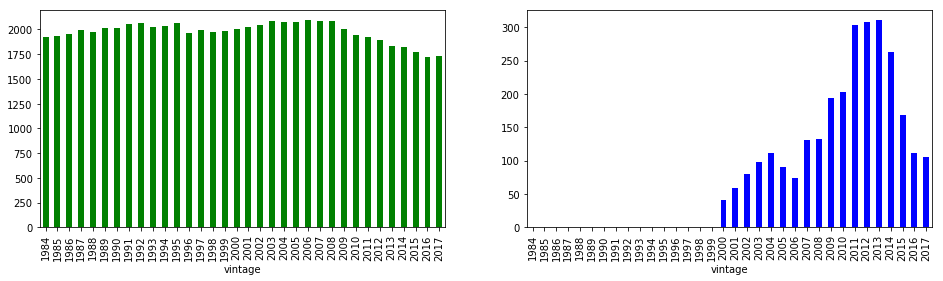

In [63]:
# cost for FT1 (conventional fuels) are relatively stable year over year; the alternative FT2 cost are lower...
#... but have a funny spike in 2011-2013 period and then taper off again --- what was going on then?
fig, axs = plt.subplots(1,2, sharex=True, sharey=False, figsize=(16,4))
g = fuel_economy.groupby('vintage')['cost_1'].mean()
h = fuel_economy.groupby('vintage')['cost_2'].mean()
g.plot(kind='bar', color='green',ax=axs[0]);
h.plot(kind='bar', color='blue', ax=axs[1]);

In [64]:
# correlations with cost: barrels_1 and barrels_2 respectively are almost exactly correlated. Total cost = barrels x price
fuel_economy.loc[:,['cost_1', 'cost_2',
                    'ghg_score', 'fuel_eco_score',
                    'co2_1', 'co2_2',
                    'range_1', 'range_2',
                   'barrels_1', 'barrels_2']].corr()

,cost_1,cost_2,ghg_score,fuel_eco_score,co2_1,co2_2,range_1,barrels_1,barrels_2
cost_1,1.000000,0.069812,-0.261538,-0.261962,-0.049475,0.016047,-0.116454,0.922903,0.061593
cost_2,0.069812,1.000000,0.059331,0.059054,0.143753,0.561445,-0.009554,0.104875,0.975310
ghg_score,-0.261538,0.059331,1.000000,0.999702,0.820889,0.179499,0.172882,-0.334316,0.075443
fuel_eco_score,-0.261962,0.059054,0.999702,1.000000,0.821253,0.179372,0.172775,-0.333764,0.073750
co2_1,-0.049475,0.143753,0.820889,0.821253,1.000000,0.321045,-0.020677,-0.115331,0.148936
co2_2,0.016047,0.561445,0.179499,0.179372,0.321045,1.000000,-0.005736,0.028822,0.558245
range_1,-0.116454,-0.009554,0.172882,0.172775,-0.020677,-0.005736,1.000000,-0.189746,-0.009581
barrels_1,0.922903,0.104875,-0.334316,-0.333764,-0.115331,0.028822,-0.189746,1.000000,0.089650
barrels_2,0.061593,0.975310,0.075443,0.073750,0.148936,0.558245,-0.009581,0.089650,1.000000


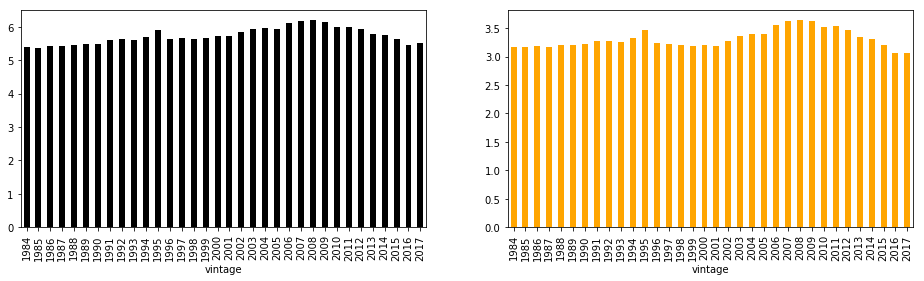

In [65]:
# Looking at a few car characteristics over time as well to get a better feeling on how technical details changed
# relatively stable average number of cylinders and displacement (in liters) (running with "mean") - slight dip in recent years
# need to add once data is transformed: start/stop technology and class of cars (which impact cost)
fig, axs = plt.subplots(1,2, sharex=True, sharey=False, figsize=(16,4))
l = fuel_economy.groupby('vintage')['num_cylinder'].mean()
m = fuel_economy.groupby('vintage')['engine_displace'].mean()
l.plot(kind='bar', color='black',ax=axs[0]);
m.plot(kind='bar', color='orange', ax=axs[1]);

## Step 1: Split dataset into Electric and Non-Electric Vehicles

Based on the information provided it is fair to assume that Electric and Hybrid Vehicles have different cost drivers than conventional fuel or gas-powered vehicles, because the cost models are different.
<br>**Note**: FT 2 is only available for vintages year 2000 onwards

In [66]:
# Not sure whether dummies are helpful, if I'm not predicting or using individual fuel_types. Turning into ordinal.
# Conventional fuel cars should be one category and EVs should be seperately. On FT1 that breaks out "Electricity".
# Need to break out Electricity=5 for EVs separately
is_EV = (fuel_economy.loc[:,'FT1'] == 'Electricity') | (fuel_economy.loc[:,'FT2'] == 'Electricity')
fuel_economy_EV = fuel_economy.loc[is_EV,:]
fuel_economy_conventional = fuel_economy.loc[~is_EV, :]

In [67]:
fuel_economy_EV.shape

(198, 56)

In [68]:
# Where FT2=0, the cost_2 is zero as well; checked that none of the columns has NaN values - yes. none.
fuel_economy_EV.loc[(fuel_economy_EV.loc[:,'FT2'] == 0),'cost_2'].sum()

0

In [69]:
# check on empty/0 columns, when FT2 == 0 (133 vehicles): everything except _1 related values, num_gears, class_num, wheel_drive_num and _type
# check on emtpy/0 colums, when FT != 0 (65 vehicles): guzzler tax is 0, chargers, all range_1, transm_type = 0 (always Automatic), kW
fuel_economy_EV.loc[(fuel_economy_EV.loc[:,'FT2'] == 0), :].count()

vintage              133
make                 133
model                133
class                133
wheel_drive          133
transm               133
num_cylinder         133
engine_displace      133
turbo                133
super                133
FT                   133
FT1                  133
FT2                  133
combi_mpg_1          133
combi_mpg_2          133
cost_1               133
cost_2               133
guzzler_tax          133
barrels_1            133
barrels_2            133
co2_1                133
co2_2                133
fuel_eco_score       133
ghg_score            133
start_stop           133
charger              133
charger_alt          133
range_1              133
range_city_1         133
range_hw_1           133
range_2              133
range_city_2         133
range_hw_2           133
Diesel               133
Electricity          133
Midgrade Gasoline    133
Natural Gas          133
Premium Gasoline     133
Regular Gasoline     133
E85                  133


In [70]:
fuel_economy_conventional.shape

(37915, 56)

** observation** From the 198 EV- or Hybrid vehicles, there are 'only' 65 vehicles that have a FT2 and related information. So for this subset, where *FT2 != 0* it could be worthwhile looking at *cost_2* - otherwise, might be better to focus on *cost_1* for the majority of vehicles.

In [71]:
# same checks as above --- plus:
# check on empty/0, when FT2 == 0 (36,542 vehicles): all dependent values _2 except for co2_2; charger; all range-values are zero, Electricity (FT1),
# ... all FT2-types (Electricity, E85, Natural Gas, Propane), kW and kw_alt
# check on empty/o, when FT2 !=0 (1,373 vehicles): charger, charger_alt, all ranges, some fuel_types, kW and kw_alt

fuel_economy_conventional.loc[(fuel_economy_conventional.loc[:,'FT2'] == 0), :].count()

vintage              36542
make                 36542
model                36542
class                36542
wheel_drive          36542
transm               36542
num_cylinder         36542
engine_displace      36542
turbo                36542
super                36542
FT                   36542
FT1                  36542
FT2                  36542
combi_mpg_1          36542
combi_mpg_2          36542
cost_1               36542
cost_2               36542
guzzler_tax          36542
barrels_1            36542
barrels_2            36542
co2_1                36542
co2_2                36542
fuel_eco_score       36542
ghg_score            36542
start_stop           36542
charger              36542
charger_alt          36542
range_1              36542
range_city_1         36542
range_hw_1           36542
range_2              36542
range_city_2         36542
range_hw_2           36542
Diesel               36542
Electricity          36542
Midgrade Gasoline    36542
Natural Gas          36542
P

**observation** From 37,915 conventional vehicles, there are about 1,373 vehicles that have a FT2 and related information {none of which is Electric, because we split that out earlier}. It probably makes sense to separate the conventional_dataframe into vehicles that have only 1 fuel type (majority of 36,542) and those with more than 1 fuel type.

## Step 2: Clean up data further

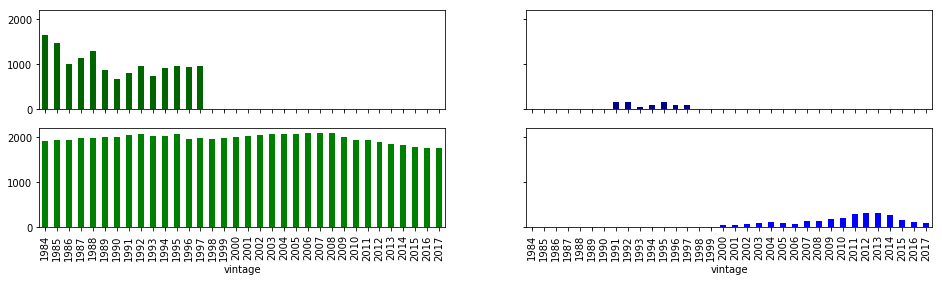

In [74]:
# check cost development with vintage years in newly split data sets
# in EV-dataset (upper row), cost seem to exist only for vintage years 1984 to 1997 for FT1 and FT2 ??? - strange.
# in conventional-dataset (second row), cost for FT2 (which is NOT electric as per definition) exist only from 2000 onwards ???
# in both dataframes (EV and conventional), the cost for FT2 is negligiblely small compared to overall cost
# in conventional dataset - the FT2 cost is the one that seems to cause the spike for the 2011-2014 period [might be E85 or gas]
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,4))
a = fuel_economy_EV.groupby('vintage')['cost_1'].mean()
b = fuel_economy_EV.groupby('vintage')['cost_2'].mean()
c = fuel_economy_conventional.groupby('vintage')['cost_1'].mean()
d = fuel_economy_conventional.groupby('vintage')['cost_2'].mean()

a.plot(kind='bar', color='darkgreen',ax=axs[0,0]);
b.plot(kind='bar', color='darkblue', ax=axs[0,1]);
c.plot(kind='bar', color='green', ax=axs[1,0]);
d.plot(kind='bar', color='blue', ax=axs[1,1]);

In [75]:
fuel_economy_EV.columns

Index(['vintage', 'make', 'model', 'class', 'wheel_drive', 'transm',
       'num_cylinder', 'engine_displace', 'turbo', 'super', 'FT', 'FT1', 'FT2',
       'combi_mpg_1', 'combi_mpg_2', 'cost_1', 'cost_2', 'guzzler_tax',
       'barrels_1', 'barrels_2', 'co2_1', 'co2_2', 'fuel_eco_score',
       'ghg_score', 'start_stop', 'charger', 'charger_alt', 'range_1',
       'range_city_1', 'range_hw_1', 'range_2', 'range_city_2', 'range_hw_2',
       'Diesel', 'Electricity', 'Midgrade Gasoline', 'Natural Gas',
       'Premium Gasoline', 'Regular Gasoline', 'E85', 'Electricity',
       'Natural Gas', 'Propane', 'pays_guzzler_tax', 'has_start_stop',
       'has_turbo', 'has_super', 'transm_type', 'num_gears', 'class_num',
       'wheel_drive_num', 'wheel_drive_type', 'kW', 'kw_alt', 'miles_1',
       'miles_2'],
      dtype='object')

Electric or Hybrid, cost_1,  co2_1


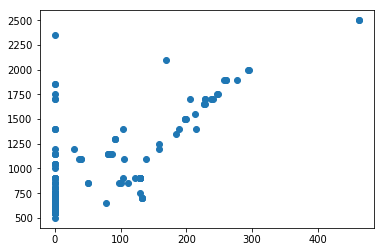

Electric or Hybrid, cost_1,  co2_2


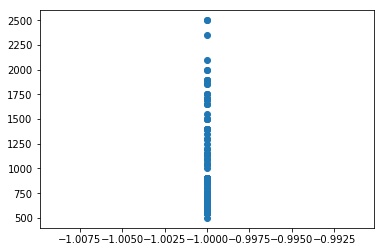

Electric or Hybrid, cost_1,  combi_mpg_1


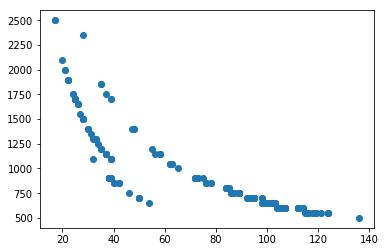

Electric or Hybrid, cost_1,  combi_mpg_2


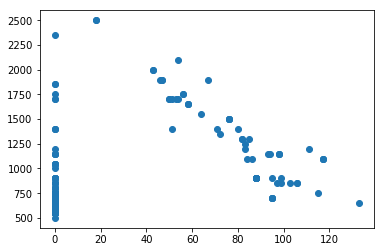

Electric or Hybrid, cost_1,  class_num


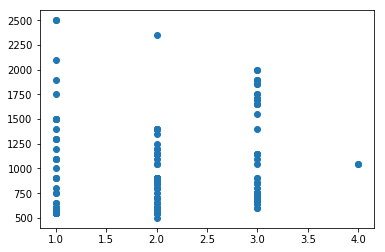

Electric or Hybrid, cost_1,  kW


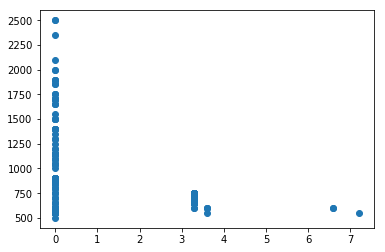

Electric or Hybrid, cost_1,  ghg_score


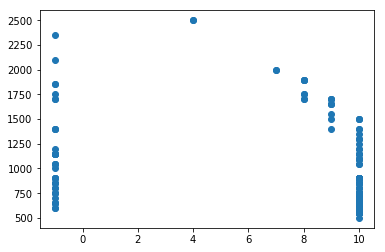

Conventional, cost_1,  co2_1


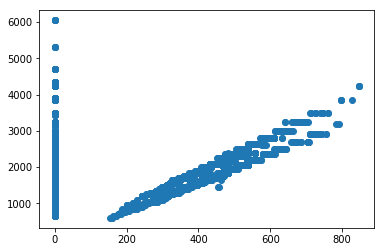

Conventional, cost_1,  co2_2


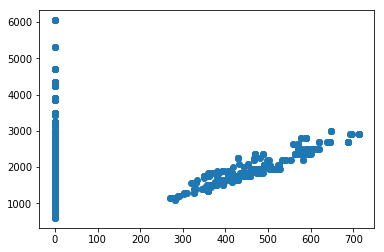

Conventional, cost_1,  combi_mpg_1


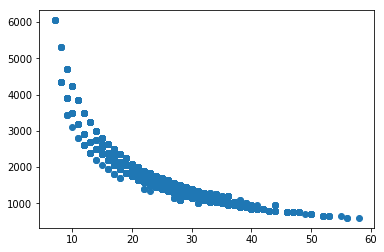

Conventional, cost_1,  combi_mpg_2


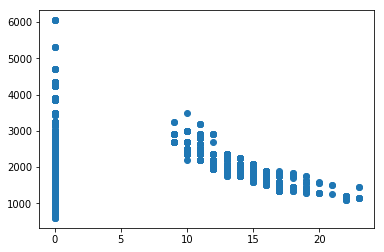

Conventional, cost_1,  class_num


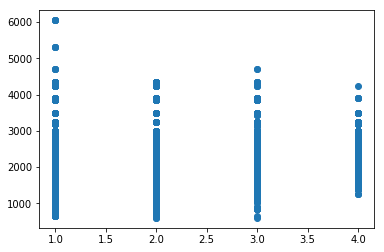

Conventional, cost_1,  pays_guzzler_tax


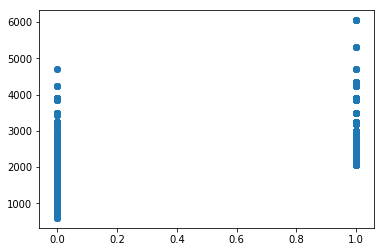

Conventional, cost_1,  ghg_score


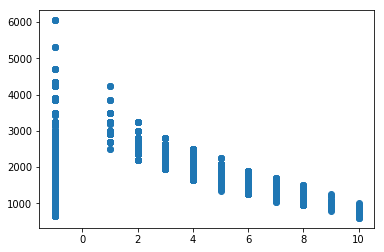

In [76]:
# create some pairplots for EV and conventional vehicles - focus on cost_1 as the main target variable (given cost_2 is so small)
# EV: Not telling = co2_2 only -1, 
# EV: Interesting = combi_mpg_1 has interesting polynomial distribution with 2 clear path {what causes paths???}; mpg_2 spotty; kW; ghg_score
# EV: Interesting = not sure my class_num is adequately classified. I would have expected to see some clear difference in cost
# EV: don't pay guzzler tax > drop

# conventional: Good: co2_1, co2_2 and both _mpg - also polynomial with 2 paths, more zeroes in co2_2 {what causes paths???}; ghg_score
# conventional: no clear pattern on class_num
# conventional: logistic regression type (binary) distinction on pays_guzzler_tax
# conventional: don't have kW > drop

for var in ['co2_1', 'co2_2','combi_mpg_1', 'combi_mpg_2', 'class_num', 'kW', 'ghg_score']:
    print ("Electric or Hybrid, cost_1, ", var)
    x = fuel_economy_EV.loc[:,var]
    y = fuel_economy_EV.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();
for var in ['co2_1', 'co2_2', 'combi_mpg_1', 'combi_mpg_2', 'class_num', 'pays_guzzler_tax', 'ghg_score']:
    print ("Conventional, cost_1, ", var)
    x = fuel_economy_conventional.loc[:, var]
    y = fuel_economy_conventional.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();

Electric or Hybrid, cost_1,  vintage


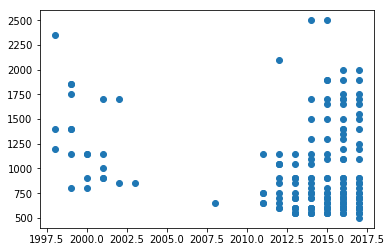

Electric or Hybrid, cost_1,  num_cylinder


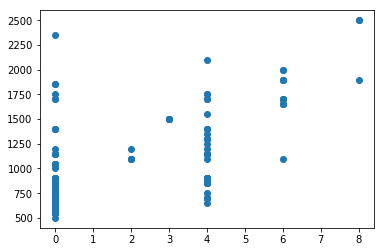

Electric or Hybrid, cost_1,  engine_displace


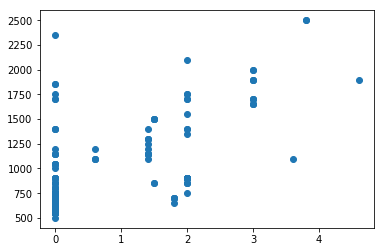

Electric or Hybrid, cost_1,  has_turbo


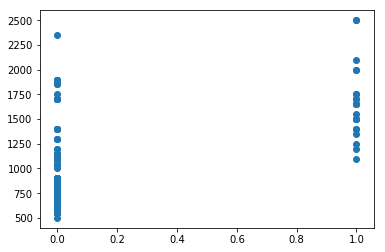

Electric or Hybrid, cost_1,  num_gears


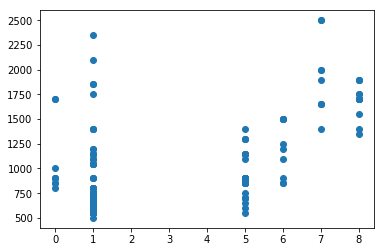

Electric or Hybrid, cost_1,  wheel_drive_num


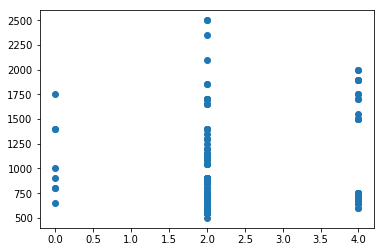

Conventional, cost_1,  num_cylinder


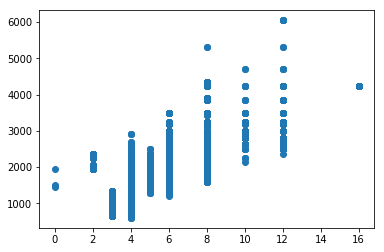

Conventional, cost_1,  engine_displace


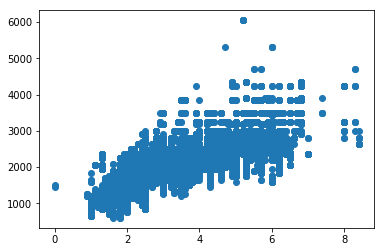

Conventional, cost_1,  has_start_stop


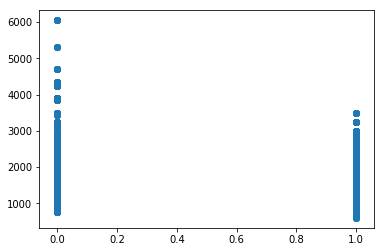

Conventional, cost_1,  num_gears


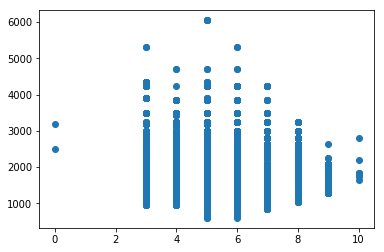

Conventional, cost_1,  wheel_drive_num


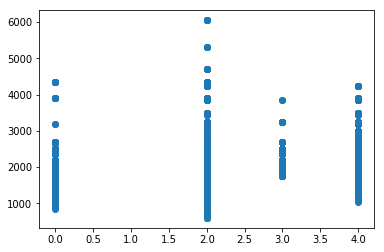

In [77]:
#EV: interesting parabel feature on vintage? - contrary to bar chart earlier this does show values for 2017 {???};
#EV: slight on engine_displace, num_cylinder, num_gears, wheel_drive_num
#EV: relatively good: has_turbo
#EV: useless - has_super, has_start_stop > drop

#conventional: good - num_cylinder, engine_displace (cloud)
#conventional: useless - vintage, has_turbo, has_super > drop; not clear on wheel_drive_num
#conventional: mediocre: very few vehicles without start_stop marginally more expensive, num_gears smaller tends to be higher cost

for var in ['vintage', 'num_cylinder', 'engine_displace', 'has_turbo', 'num_gears', 'wheel_drive_num']:
    print ("Electric or Hybrid, cost_1, ", var)
    x = fuel_economy_EV.loc[:,var]
    y = fuel_economy_EV.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();
for var in ['num_cylinder', 'engine_displace', 'has_start_stop', 'num_gears', 'wheel_drive_num']:
    print ("Conventional, cost_1, ", var)
    x = fuel_economy_conventional.loc[:, var]
    y = fuel_economy_conventional.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();

EV or Hybrid, cost_1  wheel_drive_type


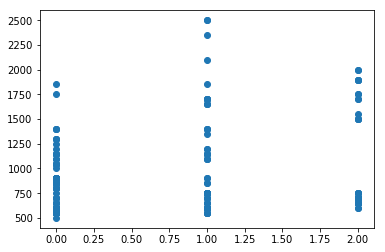

EV or Hybrid, cost_1  barrels_1


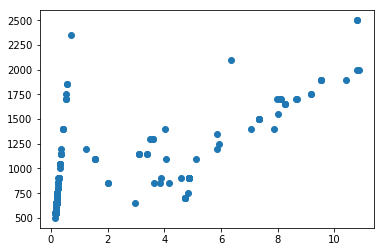

EV or Hybrid, cost_1  barrels_2


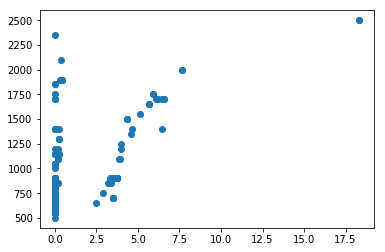

EV or Hybrid, cost_1  range_1


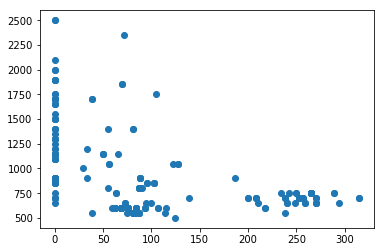

EV or Hybrid, cost_1  range_2


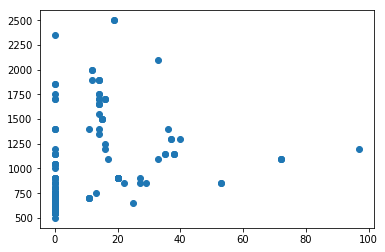

EV or Hybrid, cost_1  miles_1


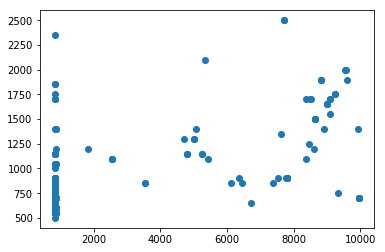

EV or Hybrid, cost_1  miles_2


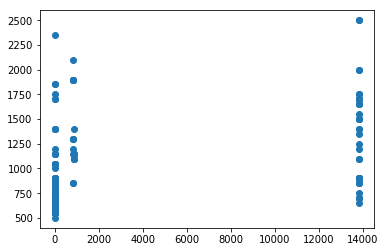

EV or Hybrid, cost_1  Regular Gasoline


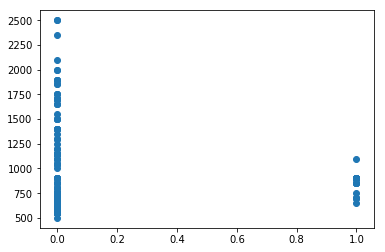

Conventional, cost 1,  transm_type


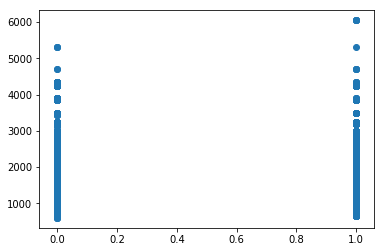

Conventional, cost 1,  wheel_drive_type


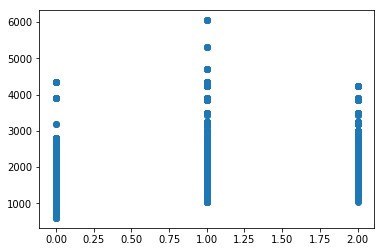

Conventional, cost 1,  barrels_1


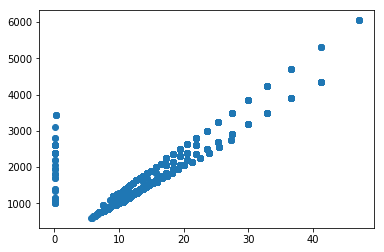

Conventional, cost 1,  barrels_2


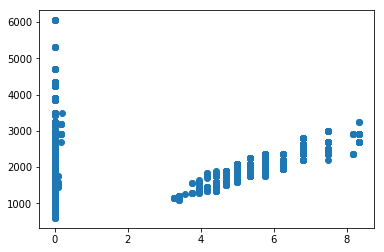

Conventional, cost 1,  miles_1


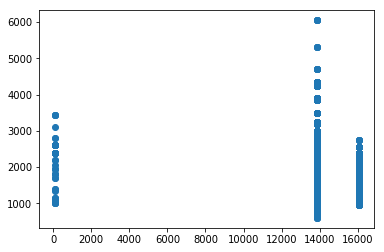

Conventional, cost 1,  miles_2


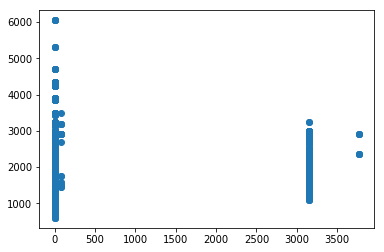

Conventional, cost 1,  Regular Gasoline


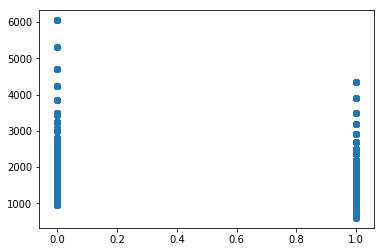

Conventional, cost 1,  Diesel


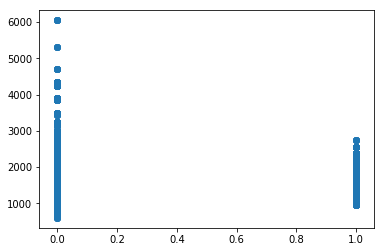

Conventional, cost 1,  Midgrade Gasoline


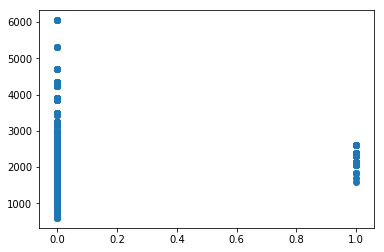

Conventional, cost 1,  E85


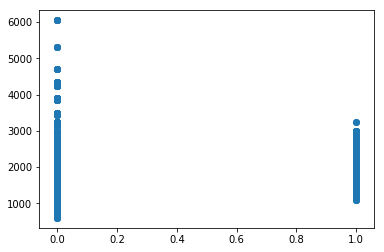

Conventional, cost 1,  Propane


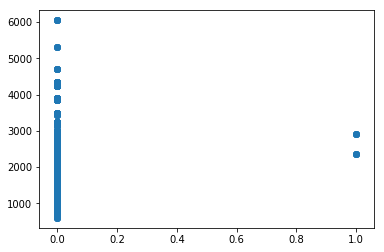

In [78]:
# EV: something - combination with regular gasoline - TBD
# EV: no clear pattern - wheel_drive_type; barrels_1; barrels_2; range_1; range_2; miles_1; miles_2
# EV: useless - transm_type always zero (automatic); Diesel; Midgrade Gasoline; E85; Propane; Natural Gas > drop

# conventional: barrels_1 and _2
# conventional: not good - transm_type, wheel_drive type (2-WD more than 4-WD ???), miles_1 and miles_2
# conventional: useless - range_1, _2 and Natural Gas > drop

for var in ['wheel_drive_type', 'barrels_1', 'barrels_2', 'range_1', 'range_2', 'miles_1', 'miles_2',
            'Regular Gasoline']:
    print ("EV or Hybrid, cost_1 ", var)
    x = fuel_economy_EV.loc[:,var]
    y = fuel_economy_EV.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();
for var in ['transm_type', 'wheel_drive_type', 'barrels_1', 'barrels_2', 'miles_1', 'miles_2',
            'Regular Gasoline', 'Diesel', 'Midgrade Gasoline', 'E85', 'Propane']:
    print ("Conventional, cost 1, ", var)
    x = fuel_economy_conventional.loc[:, var]
    y = fuel_economy_conventional.loc[:,'cost_1']
    plt.scatter(x, y)
    plt.show();

## Step 1 and a half: check on some of the spot checks from the pairplots before making a decision
Before proceeding there are a few things to check in the data for **Electric Vehicles**
1. Is relationship between cost_1 and mpg_1 polynomial (> draft lmplot): **Polynomial 5** has lowest MSE (with 5-kf)
2. What's going on with mpg_2???: Looks like the high number of zeroes are slightly distorting the picture > added **_log** and **polynomial 7** has lowest MSE (with 5-kf)
3. Is vintage a parabel (polynomial order=2) and how many vintage years are there (> draft time plt and lmplot): There is a gap in EV/Hybrids in timeline -- none shows for 2003 to 2007 {not sure why???} > would lose 22 out of 200 vehicles with cut-off. High price to pay. Look at lmplot: could be polynomial 2, but doesn't feel quite right, because in detail cost are all over the place for any vintage > **drop vintage**
4. On the EV set, the most promising candidates for Linear Regression model look like **mpg_1 (poly^5)**, **mpg_2 (log, poly^7)**, **kW**, and **ghg_score** --- what's their correlation/covariance? [note: other promising candidates: has_turbo???, num_cylinder, engine_displace, num_gears, wheel_drive_num] - Looks like **OK**

Before proceeding there are a few things to check in the data for **Conventional Vehicles**
1. On the pair comparisons, the most promising candidates for Linear Regression model like like **mpg_1 (poly^9) and mpg_2 (log)**, **barrel_1 and barrels_2**, **co2_1 and _2**, ** ghg score**, **pays_guzzler_tax** (binary: logistic regression candidate) --- what's their correlation/covariance? [note: other promising candidates: num_cylinder, engine_discplace, has_start_stop, num_gears] -- Looks like barrels and mpg_values are super close > **drop barrels**
2. **mpg_1 and mpg_2** looked like they could be polynomial, too > Looks like *mpg_1* is a **9 polynomial** and *mpg_2* is a **5-ish polynomial, but MSE results too close to tell even with _log transformation** > Only convert mpg_1 to **poly^9**

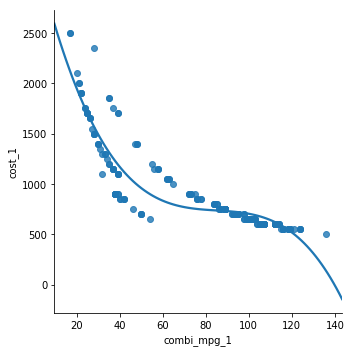

In [95]:
# Electric Vehicles - separate look at cost_1 and mpg_1: looks like polynomial 2 or 3 might fit data
sns.lmplot(data=fuel_economy_EV, x='combi_mpg_1', y='cost_1', ci=None, 
           order=3); # can include hue='class_num' where 4 is an outlier

In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [169]:
X = fuel_economy_EV.loc[:,['combi_mpg_1']]
y = fuel_economy_EV.loc[:,'cost_1']

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1,11):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    score = np.mean(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)
# Lowest score for MSE is degree=5

1 57195.7200942
2 44162.6762142
3 33040.8136438
4 28179.9173026
5 24504.2056802
6 25597.8541929
7 24832.5948353
8 42833.2094894
9 245767.282278
10 991913.481152


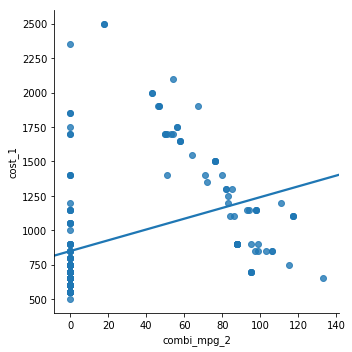

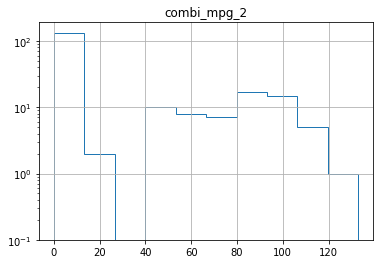

In [165]:
# Electric Vehicles - separate look at cost_1 and mpg_2: If you could take out the zeros, it would be a straight neg. correlation
# might need to use log-scale on mpg_2
sns.lmplot(data=fuel_economy_EV, x='combi_mpg_2', y='cost_1', ci=None, 
           order=1);
fuel_economy_EV.hist('combi_mpg_2', bins=10, histtype='step',
                    log=True); # mpg_2 is highly skewed, so makes a lot of sense to normalize with log-

In [191]:
fuel_economy_EV.loc[:,'combi_mpg_2_log'] = np.log(fuel_economy_EV.loc[:,'combi_mpg_2']+5, dtype='float64')
#np.log(fuel_economy_EV.loc[:,'combi_mpg_2']) log(x+2)

C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


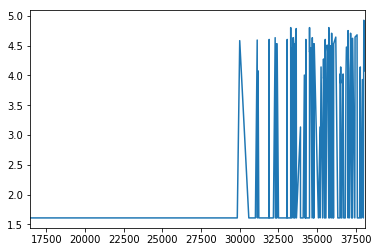

In [192]:
fuel_economy_EV.loc[:,'combi_mpg_2_log'].plot();

In [182]:
fuel_economy_EV.drop('combi_mpg_2_clean', axis=1, inplace=True)

C:\Users\rickk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


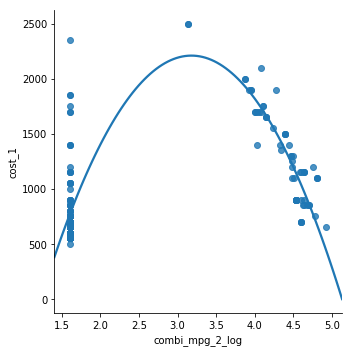

In [193]:
sns.lmplot(data=fuel_economy_EV, x='combi_mpg_2_log', y='cost_1', ci=None,
          order=2);

In [196]:
X = fuel_economy_EV.loc[:,['combi_mpg_2_log']]
y = fuel_economy_EV.loc[:,'cost_1']

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1,15):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    score = np.mean(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)
# Lowest score for MSE is degree=7

1 145678.110953
2 78619.8948901
3 75862.1598421
4 75071.0635129
5 75924.3886395
6 85704.6171364
7 74050.9906035
8 4710212009.29
9 121022.418554
10 104827.422651
11 196975.787923
12 3966982601.77
13 268910.273755
14 70643.6823211


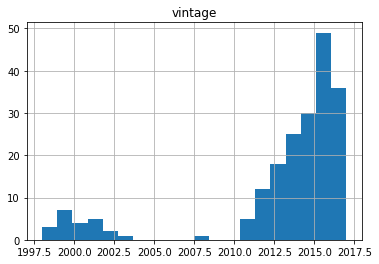

In [121]:
# Check on vintage for EVs or Hybrids: There are no EVs with vintages between 2003 and 2007
# If I make 2007 the minimum year, I lose 22 out of 200 vehicles... hmmm for one mismatched variable, doesn't feel worth the loss
fuel_economy_EV.hist('vintage', bins=20, weights=None, histtype='bar', rasterized=None);

In [124]:
print(fuel_economy_EV.shape)
fuel_economy_EV.loc[(fuel_economy_EV.loc[:,'vintage']>=2007),:].count().head(1)

(198, 57)


vintage    176
dtype: int64

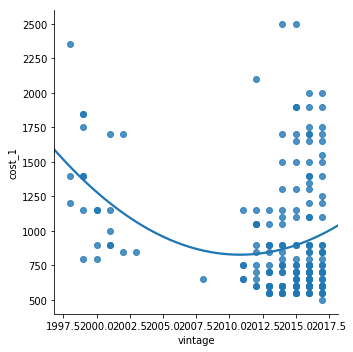

In [132]:
# Different way of handling vintage - look at lmplot - looks like cost are all over the place -- drop variabel!
sns.lmplot(data=fuel_economy_EV, x='vintage', y='cost_1', ci=None,
           order=2);

In [134]:
# Correlations don't look too close. Good to go!
fuel_economy_EV.loc[:,['combi_mpg_1', 'kW', 'ghg_score']].corr()

,combi_mpg_1,kW,ghg_score
combi_mpg_1,1.000000,0.411859,0.194663
kW,0.411859,1.000000,0.304016
ghg_score,0.194663,0.304016,1.000000


In [137]:
# Conventional vehicles - correlations check
# Super-strong correlation between mpg_1 and barrels_1; mpg_2 and barrels_2 --- feels like strong co-linearity > take out barrels
# close call between mpg and num_cylinder and engine_displace [need to add these later to model]
# ghg_score and co2_1 are closely connected but <90%
fuel_economy_conventional.loc[:,['combi_mpg_1', 'combi_mpg_2', 'barrels_1', 'barrels_2', 'co2_1', 'co2_2', 'ghg_score',
                                'pays_guzzler_tax', 'num_cylinder', 'engine_displace']].corr()

,combi_mpg_1,combi_mpg_2,barrels_1,barrels_2,co2_1,co2_2,ghg_score,pays_guzzler_tax,num_cylinder,engine_displace
combi_mpg_1,1.000000,-0.051220,-0.909090,-0.105884,0.125092,-0.034108,0.350765,-0.283980,-0.699157,-0.746745
combi_mpg_2,-0.051220,1.000000,0.042409,0.910967,0.153800,0.592667,0.100529,-0.037884,0.102134,0.116877
barrels_1,-0.909090,0.042409,1.000000,0.103203,-0.122491,0.027678,-0.299273,0.350543,0.738631,0.788775
barrels_2,-0.105884,0.910967,0.103203,1.000000,0.145553,0.567643,0.063020,-0.031998,0.155670,0.173955
co2_1,0.125092,0.153800,-0.122491,0.145553,1.000000,0.321304,0.851763,0.061708,0.088864,0.069431
co2_2,-0.034108,0.592667,0.027678,0.567643,0.321304,1.000000,0.187874,-0.013134,0.074685,0.085574
ghg_score,0.350765,0.100529,-0.299273,0.063020,0.851763,0.187874,1.000000,-0.038634,-0.100843,-0.117619
pays_guzzler_tax,-0.283980,-0.037884,0.350543,-0.031998,0.061708,-0.013134,-0.038634,1.000000,0.441880,0.320325
num_cylinder,-0.699157,0.102134,0.738631,0.155670,0.088864,0.074685,-0.100843,0.441880,1.000000,0.902795
engine_displace,-0.746745,0.116877,0.788775,0.173955,0.069431,0.085574,-0.117619,0.320325,0.902795,1.000000


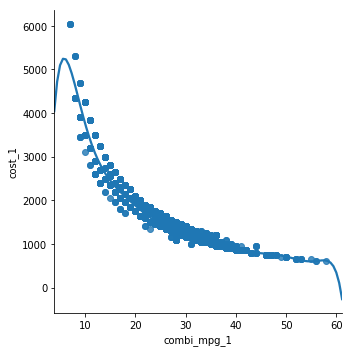

In [153]:
sns.lmplot(data=fuel_economy_conventional, x='combi_mpg_1', y='cost_1', ci=None,
          order=10);

In [200]:
X = fuel_economy_conventional.loc[:,['combi_mpg_1']]
y = fuel_economy_conventional.loc[:,'cost_1']

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1,15):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    score = np.mean(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)
# Lowest score for MSE is degree=9

1 61653.5256656
2 37400.296856
3 33373.1914685
4 32429.8822728
5 31919.9351204
6 31554.9105051
7 31468.8469409
8 31474.135668
9 31371.1127667
10 31969.5506174
11 34581.119391
12 48253.3949441
13 70206.4477391
14 127412.995301


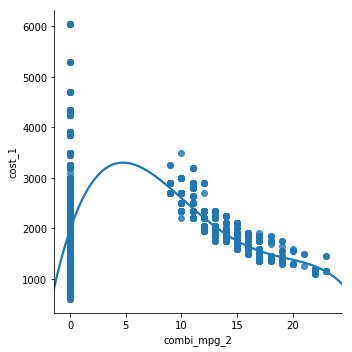

In [162]:
# combi_mpg_2 has a lot of zeros (as noted earlier, too)
sns.lmplot(data=fuel_economy_conventional, x='combi_mpg_2', y='cost_1', ci=None,
          order=5);

In [204]:
fuel_economy_conventional.loc[:,'combi_mpg_2_log'] = np.log(fuel_economy_conventional.loc[:,'combi_mpg_2']+5, dtype='float64')

C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [205]:
X = fuel_economy_conventional.loc[:,['combi_mpg_2_log']]
y = fuel_economy_conventional.loc[:,'cost_1']

kf = KFold(n_splits=5, shuffle=True)

for poly_degree in range(1,15):
    pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
    X_poly = pf.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly, y)
    score = np.mean(-cross_val_score(lr, X_poly, y, cv=kf, scoring='neg_mean_squared_error'))
    print(poly_degree, score)
# Lowest score for MSE is degree=[all too close to tell. no value add!]

1 278474.98988
2 273015.179686
3 272634.50481
4 272647.78016
5 272626.836627
6 272625.139898
7 272617.65929
8 272588.020072
9 272579.048922
10 272558.457177
11 272559.16803
12 272571.802884
13 272575.683292
14 272608.435545


## Step 3: Build a model - Linear Regression

### Electric Vehicles and Hybrids

On the EV set, the most promising candidates for Linear Regression model look like **mpg_1 (poly^5)**, **mpg_2 (log, poly^7)**, **kW**, and **ghg_score** [note: other promising candidates: has_turbo???, num_cylinder, engine_displace, num_gears, wheel_drive_num]

In [207]:
# Adding polynomial to the columns
fuel_economy_EV.loc[:,'mpg_1_poly5'] = fuel_economy_EV.loc[:,'combi_mpg_1']**(5)
fuel_economy_EV.loc[:,'mpg_2_log_poly7'] = fuel_economy_EV.loc[:,'combi_mpg_2_log']**(7)

C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [218]:
fuel_economy_EV.shape

(198, 59)

In [237]:
feature_cols_EV = ['combi_mpg_1', 'mpg_1_poly5','combi_mpg_2', 'mpg_2_log_poly7', 'kW', 'ghg_score', 'engine_displace',
                  'num_cylinder', 'num_gears', 'wheel_drive_num', 'has_turbo']
X_EV = fuel_economy_EV.loc[:, feature_cols_EV]
y_EV = fuel_economy_EV.loc[:,'cost_1']

lr_EV = LinearRegression()

X_EV_train, X_EV_test, y_EV_train, y_EV_test = train_test_split(X_EV, y_EV, random_state=99)
lr_EV.fit(X_EV_train, y_EV_train)

y_EV_pred = lr_EV.predict(X_EV_test)

In [238]:
print ('Test MSE:', metrics.mean_squared_error(y_EV_test, y_EV_pred))
print ('Test MAE:', metrics.mean_absolute_error(y_EV_test, y_EV_pred))
print ('TestRMSE:', metrics.mean_squared_error(y_EV_test, y_EV_pred)**0.5)
print("")
print ('Train MSE:', metrics.mean_squared_error(y_EV_train, lr_EV.predict(X_EV_train)))
print ('Train MAE:', metrics.mean_absolute_error(y_EV_train, lr_EV.predict(X_EV_train)))
print ('TrainRMSE:', metrics.mean_squared_error(y_EV_train, lr_EV.predict(X_EV_train))**0.5)

Test MSE: 11607.3409669
Test MAE: 76.1843344012
TestRMSE: 107.737370336

Train MSE: 5750.19396012
Train MAE: 56.6532218695
TrainRMSE: 75.8300333649


In [239]:
scores = -cross_val_score(lr_EV, X_EV, y_EV, cv=197, scoring='neg_mean_squared_error')
rmse = np.sqrt(scores)
print('EV RMSE', np.mean(rmse))
print("")
kf = KFold(n_splits=5, shuffle=True)
scores_1 = -cross_val_score(lr_EV, X_EV, y_EV, cv=kf, scoring='neg_mean_squared_error')
rmse_1=np.sqrt(scores_1)
print('EV Kfold 5 RMSE',np.mean(rmse_1))

EV RMSE 66.7353035174

EV Kfold 5 RMSE 92.2317850794


In [240]:
null_pred_EV = np.ones(y_EV_test.shape)
null_pred_EV *= y_EV_train.mean()
np.sqrt(metrics.mean_squared_error(y_EV_test, null_pred_EV))

457.40153195163435

In [241]:
y_EV_train.mean()

937.1621621621622

### Conclusion for Electric Vehicles:

1. Introduced some **variance** into the model with additional complexity, it seems to overfit or underfit compared to the training set and the overall dataset looking at RMSE values if we exclude any of the technical features - Higher on Test than on Train: started of with RMSE of Test=139, Train=89, n-1-cross=73, kFold-5=~110
2. Adding all other technical features, brings the RMSE down to Test=107, Train=76, n-1-cross=66, and kFold-5=~90 = much better!!!
3. ... all compared to Null hypothesis - which is simply predicting the mean of RMSE = 457.4 and a mean of 937.16 across dataset
4. ... meaning: **model** comes super close predict accurate value within ~10% margin give or take a few

### Conventional Vehicles

On conventional vehicles, the most promising candidates for Linear Regression model look like **mpg_1 (poly^9) and mpg_2 (log)**, **co2_1 and _2**, ** ghg score**, **pays_guzzler_tax** (binary: logistic regression candidate) [note: other promising candidates: num_cylinder, engine_discplace, has_start_stop, num_gears]

In [243]:
# Adding polynomials to the columns
fuel_economy_conventional.loc[:,'mpg_1_poly9'] = fuel_economy_conventional.loc[:,'combi_mpg_1']**9

C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rickk\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [246]:
fuel_economy_conventional.shape

(37915, 58)

In [273]:
feature_cols_c = ['combi_mpg_1', 'mpg_1_poly9', 'combi_mpg_2_log', 'co2_1', 'co2_2', 'ghg_score',
                 'pays_guzzler_tax', 'num_cylinder', 'engine_displace', 'has_start_stop', 'num_gears']
X_c = fuel_economy_conventional.loc[:, feature_cols_c]
y_c = fuel_economy_conventional.loc[:,'cost_1']

lr_c = LinearRegression()

X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, random_state=123)
lr_c.fit(X_c_train, y_c_train)

y_c_pred = lr_c.predict(X_c_test)

In [274]:
print ('Test MSE:', metrics.mean_squared_error(y_c_test, y_c_pred))
print ('Test MAE:', metrics.mean_absolute_error(y_c_test, y_c_pred))
print ('TestRMSE:', metrics.mean_squared_error(y_c_test, y_c_pred)**0.5)
print("")
print ('Train MSE:', metrics.mean_squared_error(y_c_train, lr_c.predict(X_c_train)))
print ('Train MAE:', metrics.mean_absolute_error(y_c_train, lr_c.predict(X_c_train)))
print ('TrainRMSE:', metrics.mean_squared_error(y_c_train, lr_c.predict(X_c_train))**0.5)

Test MSE: 36035.0983932
Test MAE: 142.71868591
TestRMSE: 189.829129464

Train MSE: 35994.0563668
Train MAE: 142.929234313
TrainRMSE: 189.720996115


In [275]:
scores_c = -cross_val_score(lr_c, X_c, y_c, cv=1000, scoring='neg_mean_squared_error')
rmse_c = np.sqrt(scores_c)
print('Conventional RMSE', np.mean(rmse_c))
print("")
kf = KFold(n_splits=5, shuffle=True)
scores_c5 = -cross_val_score(lr_c, X_c, y_c, cv=kf, scoring='neg_mean_squared_error')
rmse_c5 = np.sqrt(scores_c5)
print('Conventional Kfold 5 RMSE',np.mean(rmse_c5))

Conventional RMSE 180.320075135

Conventional Kfold 5 RMSE 190.111872217


In [276]:
null_pred_c = np.ones(y_c_test.shape)
null_pred_c *= y_c_train.mean()
np.sqrt(metrics.mean_squared_error(y_c_test, null_pred_c))

526.62199287875353

In [277]:
y_c_train.mean()

1975.0193416795612

### Conclusion for Electric Vehicles:

1. looking at RMSE values if we exclude any of the technical features (almost idential for Test and Train): started of with RMSE of Test=234, Train=232, 1000-cross=219, kFold-5=~233
2. Adding all other technical features, brings the RMSE down to Test=190, Train=190, 1000-cross=180, and kFold-5=~190 = much better!!!
3. ... all compared to Null hypothesis - which is simply predicting the mean of RMSE = 526.6 and a mean of 1,975 across dataset
4. ... meaning: **model** comes super close predict accurate value within ~10% margin give or take a few

## Additional tasks [to be completed over weekend as agreed]

**Practice KNN and decision-trees ** Predict class_num based on other features -- that's more of a KNN or decision-tree problem XL/L/M/S cars similar to the basketball player problem in lesson 12!

**Practice Lasso and Ridge on a fuller set of features to control coef_ ** If it would be possible to throw in more features for both the fuel_eco_score and for cost_1 predictions, it will be necessary to use Ridge -- so that it can penalize/eliminate coefficients for highly colinear variables - such as mpg and barrels (which I did manually) --- would be great to compare!!!

**Fun part ** Logistic regression on cost_1 for conventional vehicles with pays_guzzler_tax

In [ ]:
# note: funny spike on cost_2 around 2012 or so > need to find driver --- if more time: dig in!!!

In [ ]:
# not relevant, but noted: in the column 'make' I saw a few combination from car company and model name